Merged Dataset

In [81]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score





In [82]:
#importing files
file_path1= r"C:\Users\Dell\Downloads\internship datasets\weather_features.xlsx"
file_path2= r"C:\Users\Dell\Downloads\internship datasets\energy_dataset.xlsx"
Weather_data=pd.read_excel(file_path1)
Energy_data=pd.read_excel(file_path2)

In [83]:
#removing 'city_name' column
Weather_data=Weather_data.drop(columns=['city_name'])

In [84]:
#mode function
def most_frequent(series):
    return series.mode()[0]

In [85]:
# printing all columns
print(Weather_data.columns)
                                                  
                                                     

Index(['dt_iso', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_description', 'weather_icon'],
      dtype='object')


In [86]:
# Aggregating the weather data

Weather_data.columns = Weather_data.columns.str.strip()

# Define the columns to aggregate
columns_to_aggregate = {
    'temp': 'mean',
    'temp_min': 'mean',
    'temp_max': 'mean',
    'pressure': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'wind_deg': 'mean',
    'rain_1h': 'mean',
    'rain_3h': 'mean',
    'snow_3h': 'mean',
    'clouds_all': 'mean',
    'weather_id': 'mean',
    'weather_main': most_frequent,
    'weather_description': most_frequent,
    'weather_icon': most_frequent
}

# Keep only columns that exist in the DataFrame
columns_to_aggregate = {k: v for k, v in columns_to_aggregate.items() if k in Weather_data.columns}

# Group by and aggregate the data
aggregated_data = Weather_data.groupby('dt_iso').agg(columns_to_aggregate).reset_index()

print(aggregated_data.head())


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2809844960.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'int'
  return series.mode()[0]
C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2809844960.py:3: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  return series.mode()[0]


                      dt_iso        temp    temp_min    temp_max  pressure  \
0  2015-01-01 00:00:00+01:00  272.491463  272.491463  272.491463    1016.4   
1  2015-01-01 01:00:00+01:00  272.512700  272.512700  272.512700    1016.2   
2  2015-01-01 02:00:00+01:00  272.099137  272.099137  272.099137    1016.8   
3  2015-01-01 03:00:00+01:00  272.089469  272.089469  272.089469    1016.6   
4  2015-01-01 04:00:00+01:00  272.145900  272.145900  272.145900    1016.6   

   humidity  wind_speed  wind_deg  rain_1h  rain_3h  snow_3h  clouds_all  \
0      82.4         2.0     135.2      0.0      0.0      0.0         0.0   
1      82.4         2.0     135.8      0.0      0.0      0.0         0.0   
2      82.0         2.4     119.0      0.0      0.0      0.0         0.0   
3      82.0         2.4     119.2      0.0      0.0      0.0         0.0   
4      82.0         2.4     118.4      0.0      0.0      0.0         0.0   

   weather_id weather_main weather_description weather_icon  
0       800.

In [87]:
aggregated_data.shape

(35064, 16)

In [88]:
#Creating a merged dataset
Merged_dataset= pd.merge(Energy_data,aggregated_data,left_on='time',right_on='dt_iso',how='left')

In [89]:
Merged_dataset['time']=Merged_dataset['time'].astype(str)

In [90]:
output_file = 'Merged_dataset.xlsx'
Merged_dataset.to_excel(output_file,index=False)

In [91]:
print(Merged_dataset.head())

                        time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.

In [92]:
Merged_dataset.shape

(35064, 45)

In [93]:
# dropping dt_iso column
Merged_dataset.drop(columns=['dt_iso'], inplace=True)
print(Merged_dataset.head())

                        time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil coal-derived gas  \
0                                 329.0                                 0.0   
1                                 328.0                                 0.0   
2                                 323.0                                 0.0   
3                                 254.0                                 0.0   
4                                 187.0                                 0.0   

   generation fossil gas  generation fossil hard coal  generation fossil oil  \
0                 4844.0                       4821.0                  162.0   
1                 5196.0                       4755.

In [94]:
# converting time to str type
Merged_dataset['time']=Merged_dataset['time'].astype(str)

In [95]:
output_file = 'Merged_dataset.xlsx'
Merged_dataset.to_excel(output_file,index=False)
print(Merged_dataset.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 44 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil coal-derived gas           35046 non-null  float64
 4   generation fossil gas                        35046 non-null  float64
 5   generation fossil hard coal                  35046 non-null  float64
 6   generation fossil oil                        35045 non-null  float64
 7   generation fossil oil shale                  35046 non-null  float64
 8   generation fossil peat                       35046 non-null  float64
 9   generation geothermal                        35046 non-null  float64
 10

In [96]:
Merged_dataset.shape

(35064, 44)

In [97]:
#finding null columns
null_columns = Merged_dataset.columns[Merged_dataset.isnull().any()].tolist()
print(f"Columns with null values before filling: {null_columns}")


Columns with null values before filling: ['generation biomass', 'generation fossil brown coal/lignite', 'generation fossil coal-derived gas', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation hydro pumped storage aggregated', 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation marine', 'generation nuclear', 'generation other', 'generation other renewable', 'generation solar', 'generation waste', 'generation wind offshore', 'generation wind onshore', 'forecast wind offshore eday ahead', 'total load actual']


In [98]:
# filling the null values
Merged_dataset[null_columns] = Merged_dataset[null_columns].ffill().bfill()


In [99]:
# Check for remaining null values and drop columns still containing nulls
null_columns_after_filling = Merged_dataset.columns[Merged_dataset.isnull().any()].tolist()
print(f"Columns with null values after filling: {null_columns_after_filling}")



Columns with null values after filling: ['generation hydro pumped storage aggregated', 'forecast wind offshore eday ahead']


In [100]:
Merged_dataset = Merged_dataset.drop(columns=null_columns_after_filling)
Merged_dataset.shape

(35064, 42)

In [101]:
numeric_columns = Merged_dataset.select_dtypes(include=[np.number])
columns_with_zero_sum = numeric_columns.columns[numeric_columns.sum() == 0].tolist()
print(f"Columns with zero sum: {columns_with_zero_sum}")

# Drop columns with zero sum
Merged_dataset = Merged_dataset.drop(columns=columns_with_zero_sum)

Columns with zero sum: ['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation marine', 'generation wind offshore']


In [102]:
print(Merged_dataset.head())
Merged_dataset.shape

                        time  generation biomass  \
0  2015-01-01 00:00:00+01:00               447.0   
1  2015-01-01 01:00:00+01:00               449.0   
2  2015-01-01 02:00:00+01:00               448.0   
3  2015-01-01 03:00:00+01:00               438.0   
4  2015-01-01 04:00:00+01:00               428.0   

   generation fossil brown coal/lignite  generation fossil gas  \
0                                 329.0                 4844.0   
1                                 328.0                 5196.0   
2                                 323.0                 4857.0   
3                                 254.0                 4314.0   
4                                 187.0                 4130.0   

   generation fossil hard coal  generation fossil oil  \
0                       4821.0                  162.0   
1                       4755.0                  158.0   
2                       4581.0                  157.0   
3                       4131.0                  160.0   
4    

(35064, 36)

EDA Operations

In [103]:
# Shape of the dataset
print("Shape of the dataset:", Merged_dataset.shape)

Shape of the dataset: (35064, 36)


In [104]:
# Info about the dataset
print("\nInfo about the dataset:")
print(Merged_dataset.info())


Info about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 36 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35064 non-null  float64
 2   generation fossil brown coal/lignite         35064 non-null  float64
 3   generation fossil gas                        35064 non-null  float64
 4   generation fossil hard coal                  35064 non-null  float64
 5   generation fossil oil                        35064 non-null  float64
 6   generation hydro pumped storage consumption  35064 non-null  float64
 7   generation hydro run-of-river and poundage   35064 non-null  float64
 8   generation hydro water reservoir             35064 non-null  float64
 9   generation nuclear                           35

In [105]:
# Missing value analysis
print("\nMissing value analysis:")
missing_values = Merged_dataset.isnull().sum()
print(missing_values[missing_values > 0])



Missing value analysis:
Series([], dtype: int64)


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\1352062222.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')


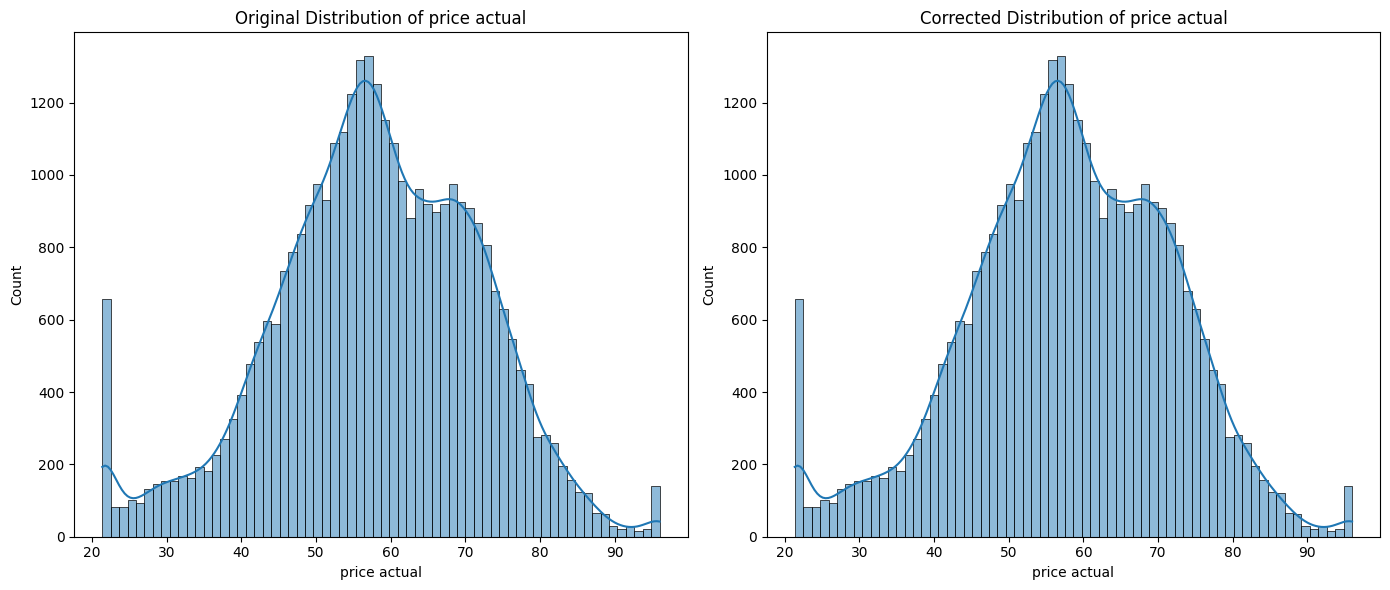

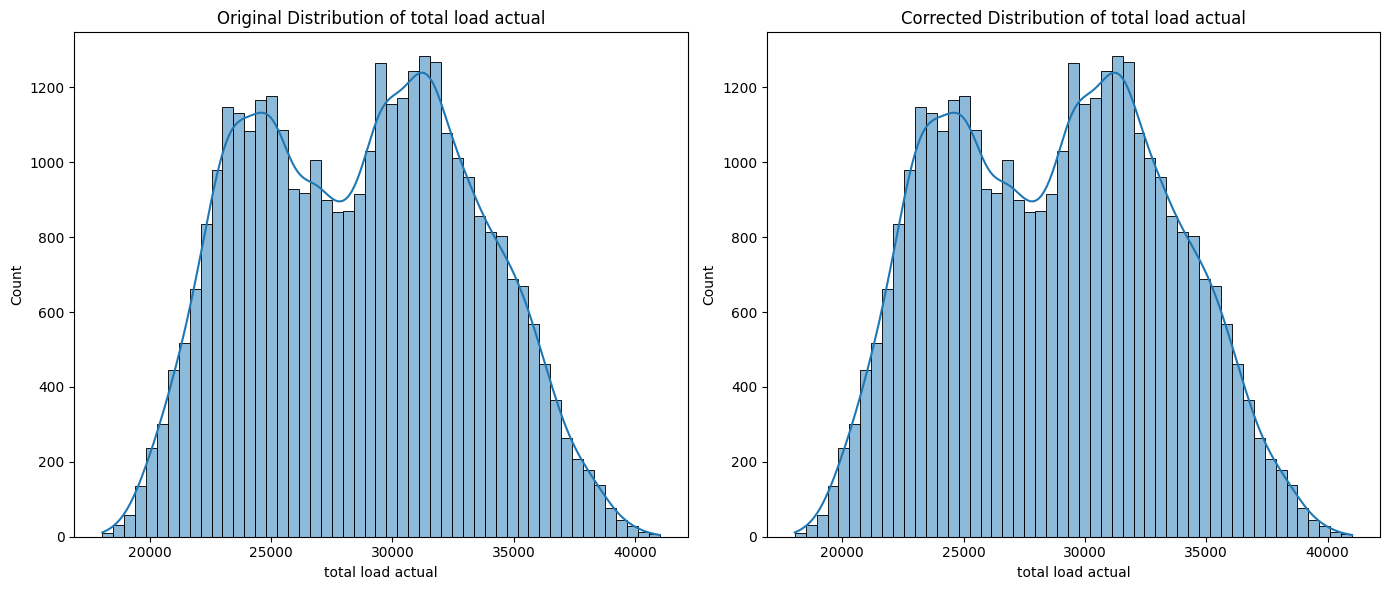

In [106]:
# Outlier detection and removal using IQR for price actual and total load

# Ensure 'time' is in datetime format

Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')


columns_to_check = ['price actual', 'total load actual']

# Function to detect and correct outliers using the IQR method
def detect_and_correct_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Correcting outliers by capping them
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df

# outlier correction function to the specified columns
for column in columns_to_check:
    Merged_dataset = detect_and_correct_outliers(Merged_dataset, column)

# plot distr before and after outlier correction
def plot_distributions_before_after(original_df, corrected_df, columns):
    for col in columns:
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(original_df[col], kde=True)
        plt.title(f'Original Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

        plt.subplot(1, 2, 2)
        sns.histplot(corrected_df[col], kde=True)
        plt.title(f'Corrected Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

# Create a copy of the dataset before outlier correction
Merged_dataset_original = Merged_dataset.copy()

# Plot distributions before and after outlier correction
plot_distributions_before_after(Merged_dataset_original, Merged_dataset, columns_to_check)



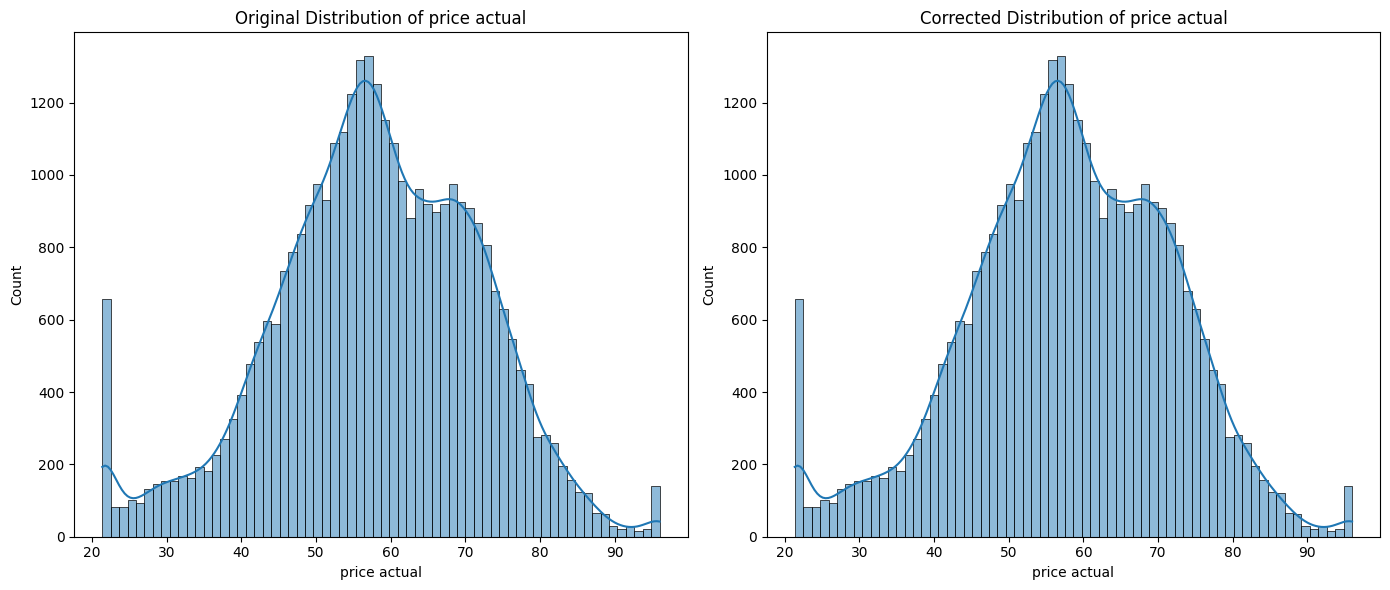

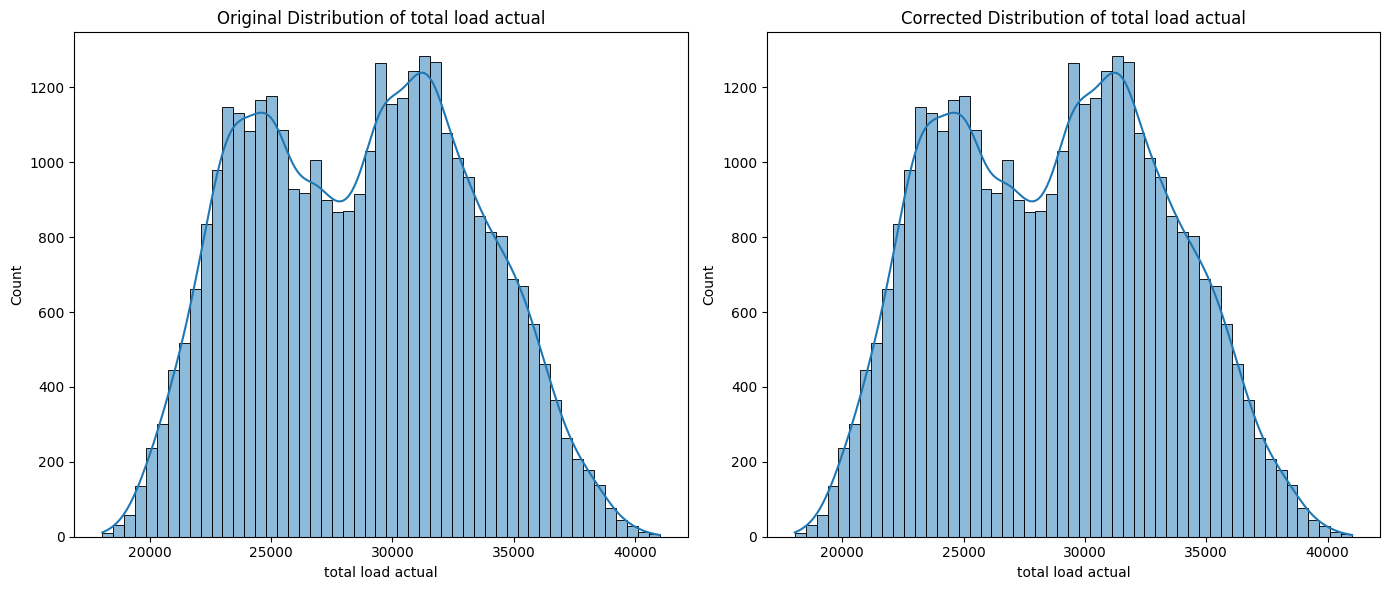

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'time' is in datetime format
Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')

columns_to_check = ['price actual', 'total load actual']

# Function to detect and correct outliers using the IQR method
def detect_and_correct_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Correcting outliers by capping them
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    
    return df  # Return the modified DataFrame

# Apply outlier correction function to the specified columns
for column in columns_to_check:
    Merged_dataset = detect_and_correct_outliers(Merged_dataset, column)

# Plot distributions before and after outlier correction
def plot_distributions_before_after(original_df, corrected_df, columns):
    for col in columns:
        plt.figure(figsize=(14, 6))

        plt.subplot(1, 2, 1)
        sns.histplot(original_df[col], kde=True)
        plt.title(f'Original Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

        plt.subplot(1, 2, 2)
        sns.histplot(corrected_df[col], kde=True)
        plt.title(f'Corrected Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')

        plt.tight_layout()
        plt.show()

# Plot distributions before and after outlier correction
plot_distributions_before_after(Merged_dataset_original, Merged_dataset, columns_to_check)

# Optionally, you can save the modified Merged_dataset back to the original variable
# Merged_dataset_original = Merged_dataset.copy()


Creating New Columns for Months and weeks

In [108]:

Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')


Merged_dataset = Merged_dataset.dropna(subset=['time'])

# Create columns for days of the week (Monday-Sunday)
Merged_dataset['day_of_week'] = Merged_dataset['time'].dt.day_name()
day_dummies = pd.get_dummies(Merged_dataset['day_of_week'], prefix='day')

# Create columns for months (January-December)
Merged_dataset['month'] = Merged_dataset['time'].dt.month_name()
month_dummies = pd.get_dummies(Merged_dataset['month'], prefix='month')


Merged_dataset_with_dummies = pd.concat([Merged_dataset, day_dummies, month_dummies], axis=1)

# Print the newly created columns for days and months
print("Newly created day columns:")
print(day_dummies.head())

print("\nNewly created month columns:")
print(month_dummies.head())

# Display the first few rows of the new dataset
print("\nFirst few rows of the new dataset with dummies:")
print(Merged_dataset_with_dummies.head())

# Save the updated dataset to a new Excel file
output_file_with_dummies = 'Merged_dataset_with_dummies.xlsx'
try:
    Merged_dataset_with_dummies.to_excel(output_file_with_dummies, index=False)
    print(f"\nFile saved successfully to {output_file_with_dummies}")
except ValueError as e:
    print(f"ValueError: {e}")
except Exception as e:
    print(f"An error occurred: {e}")



Newly created day columns:
   day_Friday  day_Monday  day_Saturday  day_Sunday  day_Thursday  \
0       False       False         False       False          True   
1       False       False         False       False          True   
2       False       False         False       False          True   
3       False       False         False       False          True   
4       False       False         False       False          True   

   day_Tuesday  day_Wednesday  
0        False          False  
1        False          False  
2        False          False  
3        False          False  
4        False          False  

Newly created month columns:
   month_December  month_February  month_January  month_March  month_November  \
0           False           False           True        False           False   
1           False           False           True        False           False   
2           False           False           True        False           False   
3           

Feature Engineering

Average Hourly, Montly and Weekly Demand:

Peak hour: 20:00
Weekday average demand: 29895.72
Weekend average demand: 27211.75


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2744834261.py:32: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=Merged_dataset, x='hour', y=demand_column, estimator='mean', ci=None)


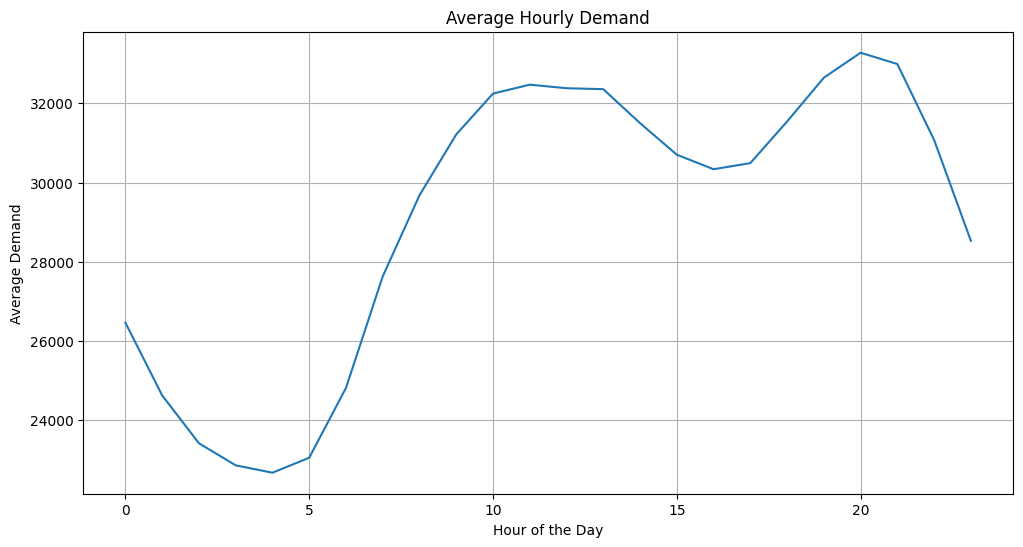

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2744834261.py:41: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Merged_dataset, x='month', y=demand_column, estimator='mean', ci=None,


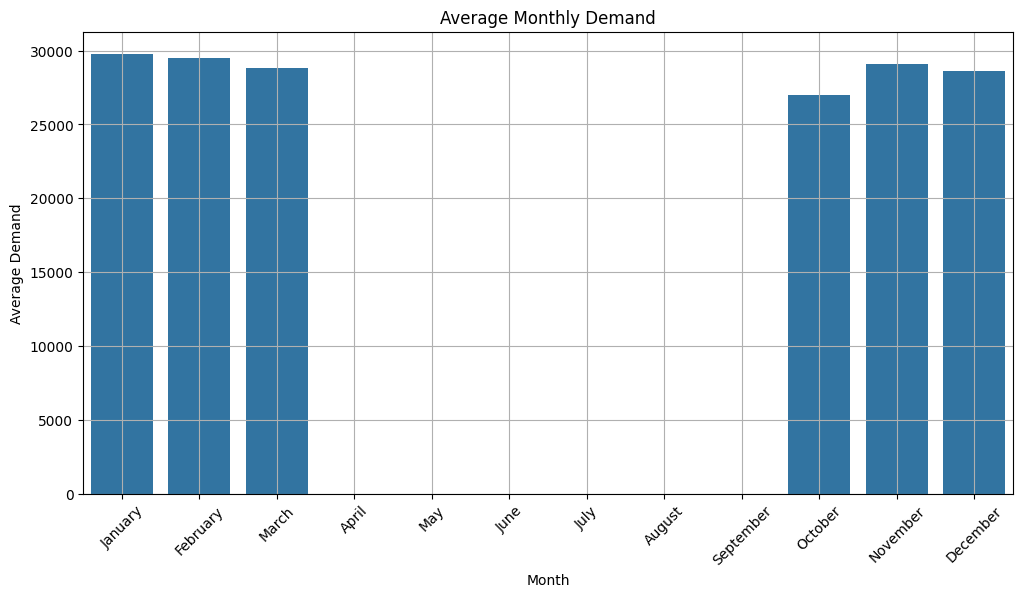

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2744834261.py:52: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Merged_dataset, x='is_weekend', y=demand_column, estimator='mean', ci=None)


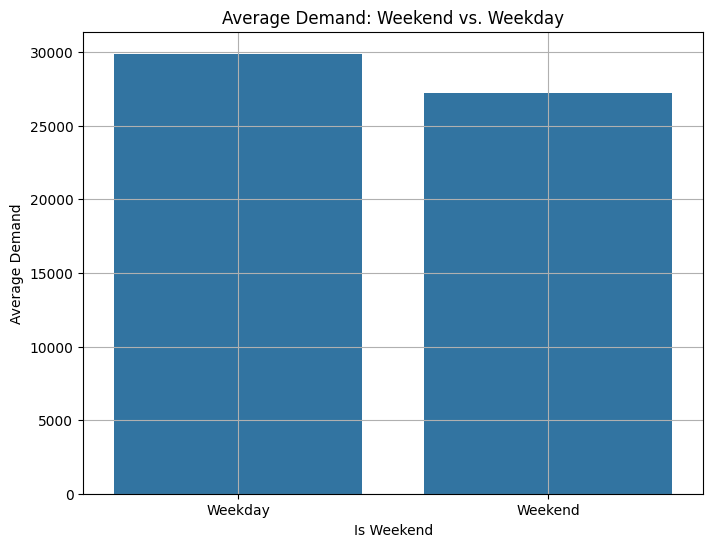

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'time' is in datetime format
Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')

# Extract necessary time features
Merged_dataset['hour'] = Merged_dataset['time'].dt.hour
Merged_dataset['day_of_week'] = Merged_dataset['time'].dt.day_name()
Merged_dataset['month'] = Merged_dataset['time'].dt.month_name()
Merged_dataset['is_weekend'] = Merged_dataset['day_of_week'].isin(['Saturday', 'Sunday'])

# Replace 'total load' with your actual demand column name
demand_column = 'total load actual'

# Identify peak hour
peak_hour = Merged_dataset.groupby('hour')[demand_column].mean().idxmax()
Merged_dataset['peak_hour'] = peak_hour
print(f"Peak hour: {peak_hour}:00")

# Compare demand on weekends vs. weekdays
weekend_vs_weekday = Merged_dataset.groupby('is_weekend')[demand_column].mean()
weekend_avg_demand = weekend_vs_weekday[True]
weekday_avg_demand = weekend_vs_weekday[False]
Merged_dataset['weekend_avg_demand'] = Merged_dataset['is_weekend'].map({True: weekend_avg_demand, False: weekday_avg_demand})
print(f"Weekday average demand: {weekday_avg_demand:.2f}")
print(f"Weekend average demand: {weekend_avg_demand:.2f}")

# Plot hourly demand
plt.figure(figsize=(12, 6))
sns.lineplot(data=Merged_dataset, x='hour', y=demand_column, estimator='mean', ci=None)
plt.title('Average Hourly Demand')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Demand')
plt.grid(True)
plt.show()

# Plot monthly demand
plt.figure(figsize=(12, 6))
sns.barplot(data=Merged_dataset, x='month', y=demand_column, estimator='mean', ci=None,
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Average Monthly Demand')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot weekend vs. weekday demand
plt.figure(figsize=(8, 6))
sns.barplot(data=Merged_dataset, x='is_weekend', y=demand_column, estimator='mean', ci=None)
plt.title('Average Demand: Weekend vs. Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Average Demand')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.grid(True)
plt.show()

# Save new values to Merged_dataset
Merged_dataset['peak_hour'] = peak_hour
Merged_dataset['weekday_avg_demand'] = weekday_avg_demand
Merged_dataset['weekend_avg_demand'] = weekend_avg_demand

# Save to CSV if needed
# Merged_dataset.to_csv('updated_dataset.csv', index=False)


Average Hourly, Montly and Weekly Prices:

Peak price hour: 19:00
Average price: 59.10
Max price: 96.00
Min price: 21.35


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\475449196.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=Merged_dataset, x='hour', y=price_column, estimator='mean', ci=None)


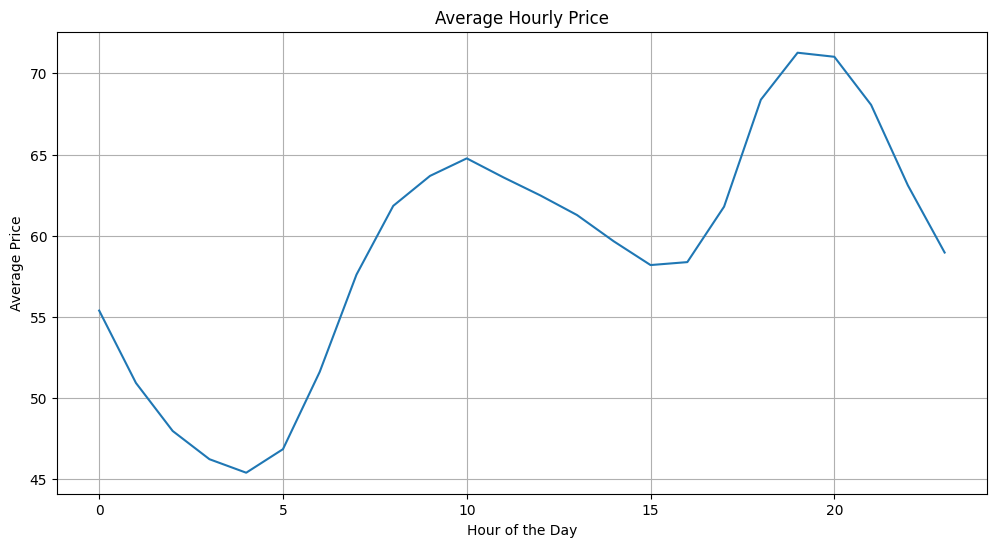

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\475449196.py:48: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Merged_dataset, x='month', y=price_column, estimator='mean', ci=None,


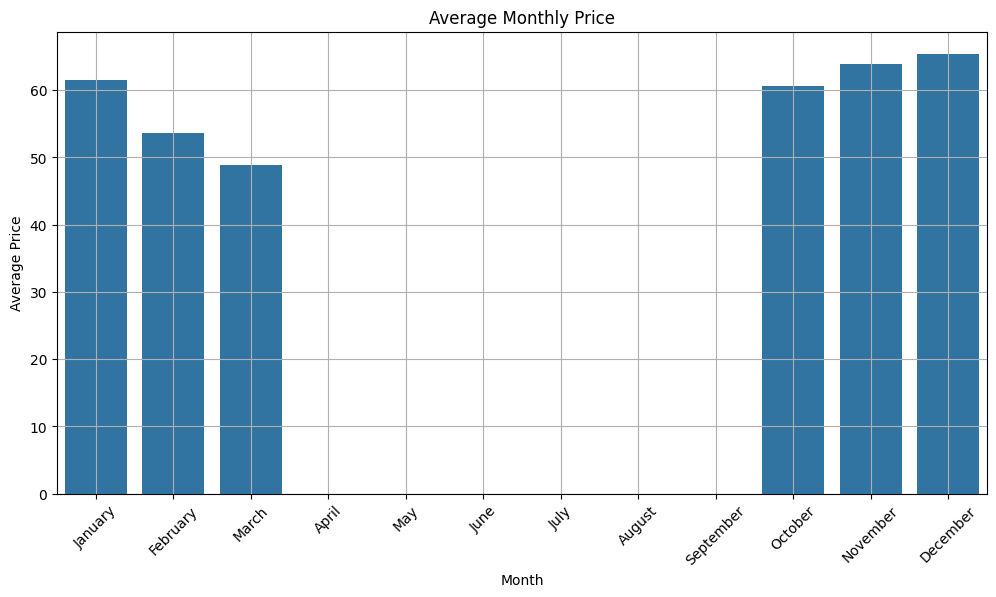

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\475449196.py:59: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Merged_dataset, x='is_weekend', y=price_column, estimator='mean', ci=None)


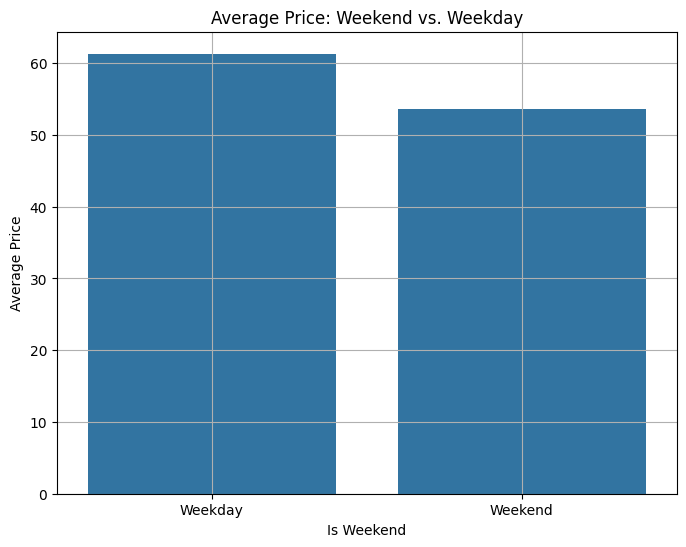

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'time' is in datetime format
Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')

# Extract necessary time features
Merged_dataset['hour'] = Merged_dataset['time'].dt.hour
Merged_dataset['day_of_week'] = Merged_dataset['time'].dt.day_name()
Merged_dataset['month'] = Merged_dataset['time'].dt.month_name()
Merged_dataset['is_weekend'] = Merged_dataset['day_of_week'].isin(['Saturday', 'Sunday'])

# Replace 'price actual' with your actual price column name
price_column = 'price actual'

# Calculate peak price, average price, max price, and min price
peak_price_hour = Merged_dataset.groupby('hour')[price_column].mean().idxmax()
average_price = Merged_dataset[price_column].mean()
max_price = Merged_dataset[price_column].max()
min_price = Merged_dataset[price_column].min()

# Add these values as new columns
Merged_dataset['peak_price_hour'] = peak_price_hour
Merged_dataset['average_price'] = average_price
Merged_dataset['max_price'] = max_price
Merged_dataset['min_price'] = min_price

print(f"Peak price hour: {peak_price_hour}:00")
print(f"Average price: {average_price:.2f}")
print(f"Max price: {max_price:.2f}")
print(f"Min price: {min_price:.2f}")

# Optional: Save to CSV if needed
# Merged_dataset.to_csv('updated_dataset_with_price_info.csv', index=False)

# Plot hourly price
plt.figure(figsize=(12, 6))
sns.lineplot(data=Merged_dataset, x='hour', y=price_column, estimator='mean', ci=None)
plt.title('Average Hourly Price')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Plot monthly price
plt.figure(figsize=(12, 6))
sns.barplot(data=Merged_dataset, x='month', y=price_column, estimator='mean', ci=None,
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Average Monthly Price')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot weekend vs. weekday price
plt.figure(figsize=(8, 6))
sns.barplot(data=Merged_dataset, x='is_weekend', y=price_column, estimator='mean', ci=None)
plt.title('Average Price: Weekend vs. Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Average Price')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.grid(True)
plt.show()


Average Hourly, Montly and Weekly Prices:

Peak price hour: 19:00
Average price: 59.10
Max price: 96.00
Min price: 21.35
All columns in Merged_dataset:
Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_description', 'weather_icon',
       'day_of_week', 'month', 'hour', 'is_weeke

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\4185004948.py:55: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=Merged_dataset, x='hour', y=price_column, estimator='mean', ci=None)


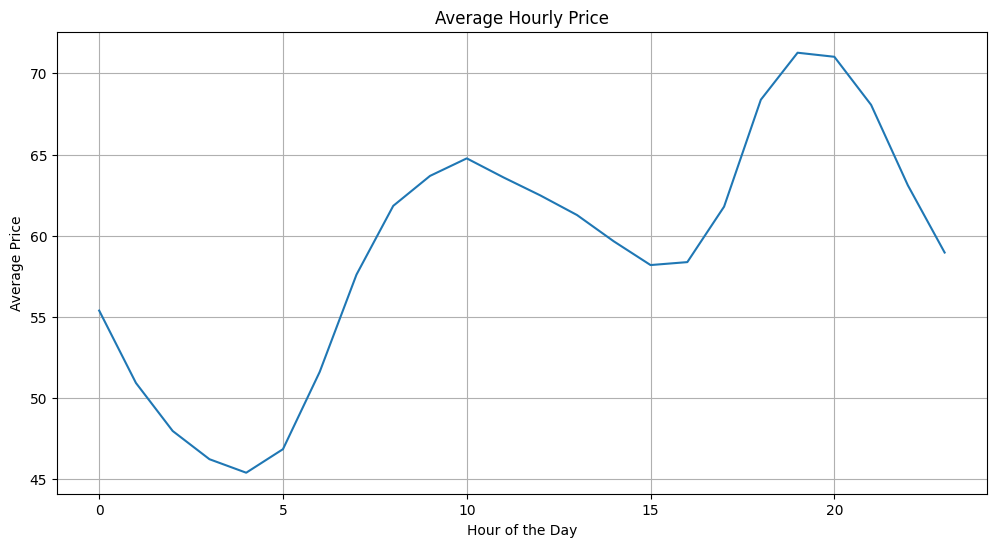

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\4185004948.py:64: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Merged_dataset, x='month', y=price_column, estimator='mean', ci=None,


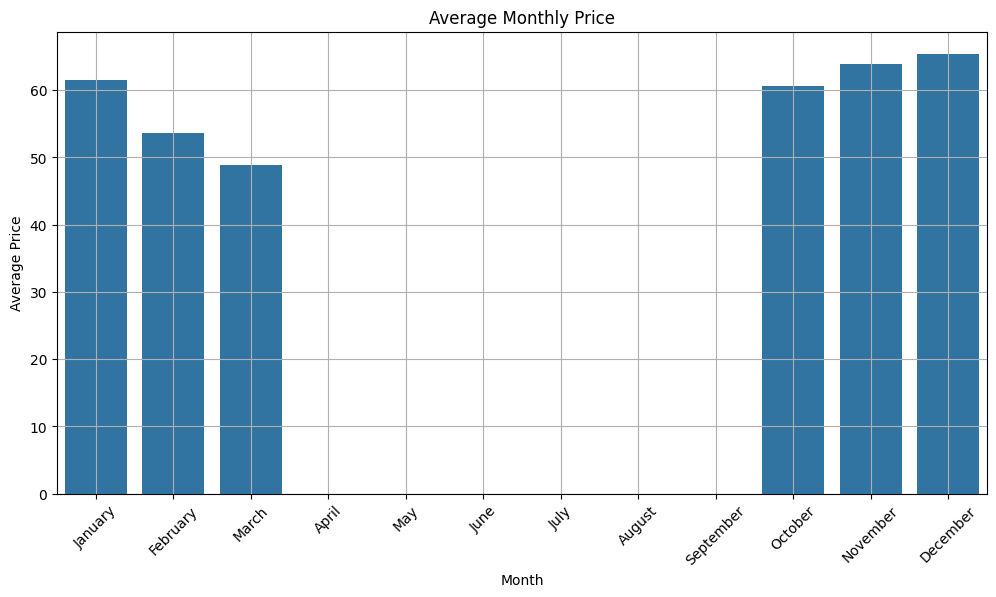

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\4185004948.py:75: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Merged_dataset, x='is_weekend', y=price_column, estimator='mean', ci=None)


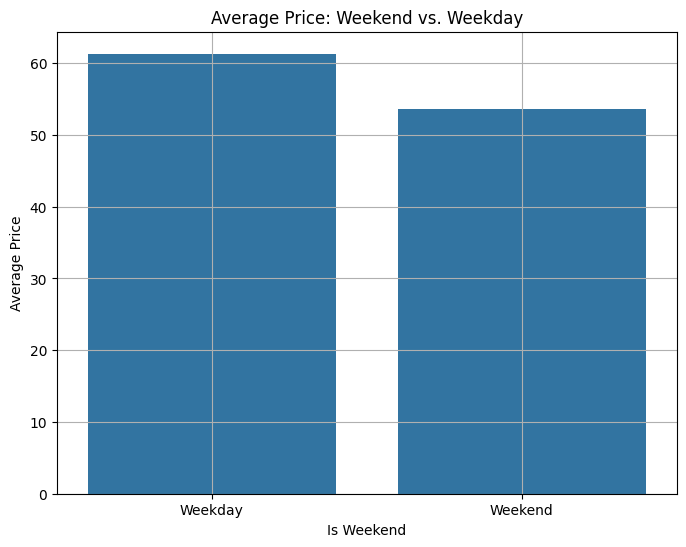

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'time' is in datetime format
Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')

# Extract necessary time features
Merged_dataset['hour'] = Merged_dataset['time'].dt.hour
Merged_dataset['day_of_week'] = Merged_dataset['time'].dt.day_name()
Merged_dataset['month'] = Merged_dataset['time'].dt.month_name()
Merged_dataset['is_weekend'] = Merged_dataset['day_of_week'].isin(['Saturday', 'Sunday'])
Merged_dataset['week'] = Merged_dataset['time'].dt.isocalendar().week

# Replace 'price actual' with your actual price column name
price_column = 'price actual'

# Calculate peak price, average price, max price, and min price
peak_price_hour = Merged_dataset.groupby('hour')[price_column].mean().idxmax()
average_price = Merged_dataset[price_column].mean()
max_price = Merged_dataset[price_column].max()
min_price = Merged_dataset[price_column].min()

# Add these values as new columns
Merged_dataset['peak_price_hour'] = peak_price_hour
Merged_dataset['average_price'] = average_price
Merged_dataset['max_price'] = max_price
Merged_dataset['min_price'] = min_price

# Calculate monthly and weekly average prices
monthly_avg_price = Merged_dataset.groupby('month')[price_column].mean().rename('monthly_avg_price')
weekly_avg_price = Merged_dataset.groupby('week')[price_column].mean().rename('weekly_avg_price')

# Merge monthly and weekly averages back to the original dataset
Merged_dataset = Merged_dataset.merge(monthly_avg_price, on='month', how='left')
Merged_dataset = Merged_dataset.merge(weekly_avg_price, on='week', how='left')

print(f"Peak price hour: {peak_price_hour}:00")
print(f"Average price: {average_price:.2f}")
print(f"Max price: {max_price:.2f}")
print(f"Min price: {min_price:.2f}")

# Print all columns of Merged_dataset
print("All columns in Merged_dataset:")
print(Merged_dataset.columns)

# Print first few rows of the updated dataset
print(Merged_dataset.head())

# Optional: Save to CSV if needed
# Merged_dataset.to_csv('updated_dataset_with_price_info.csv', index=False)

# Plot hourly price
plt.figure(figsize=(12, 6))
sns.lineplot(data=Merged_dataset, x='hour', y=price_column, estimator='mean', ci=None)
plt.title('Average Hourly Price')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

# Plot monthly price
plt.figure(figsize=(12, 6))
sns.barplot(data=Merged_dataset, x='month', y=price_column, estimator='mean', ci=None,
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Average Monthly Price')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plot weekend vs. weekday price
plt.figure(figsize=(8, 6))
sns.barplot(data=Merged_dataset, x='is_weekend', y=price_column, estimator='mean', ci=None)
plt.title('Average Price: Weekend vs. Weekday')
plt.xlabel('Is Weekend')
plt.ylabel('Average Price')
plt.xticks([0, 1], ['Weekday', 'Weekend'])
plt.grid(True)
plt.show()


Visualization

Distribution of Peak Hour, Months, Days of a week and Weekday Vs Weekends:

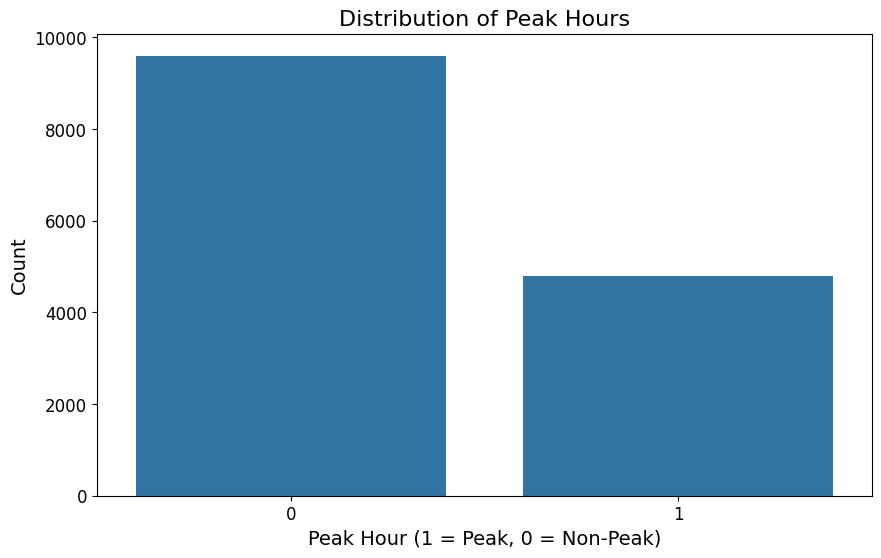

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\1659770197.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=feature_engineered_dataset, x='month', palette='viridis')


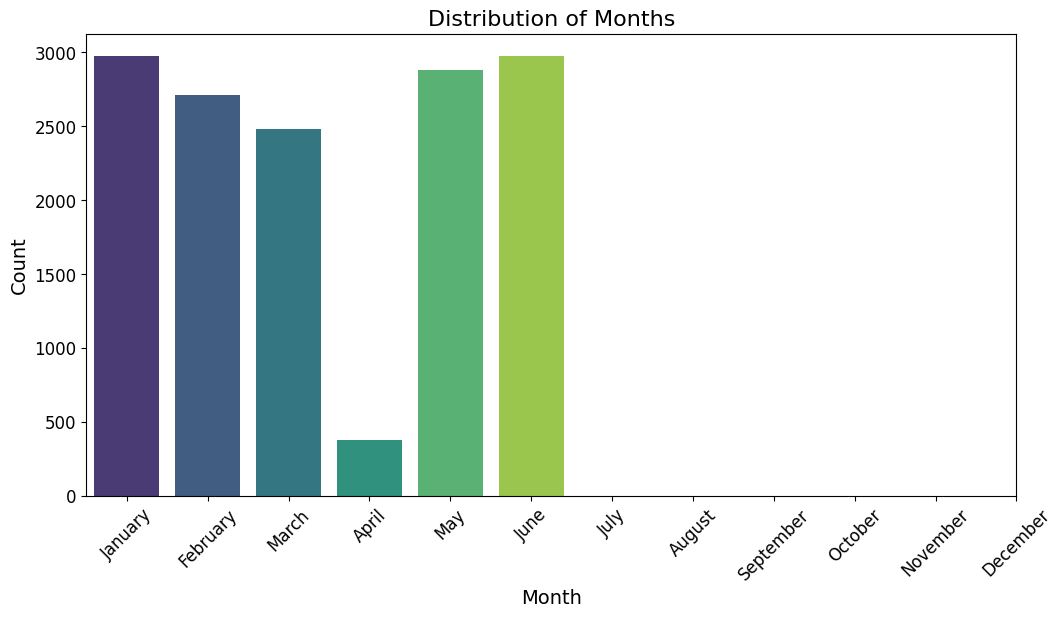

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\1659770197.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=feature_engineered_dataset, x='day_of_week', palette='viridis')


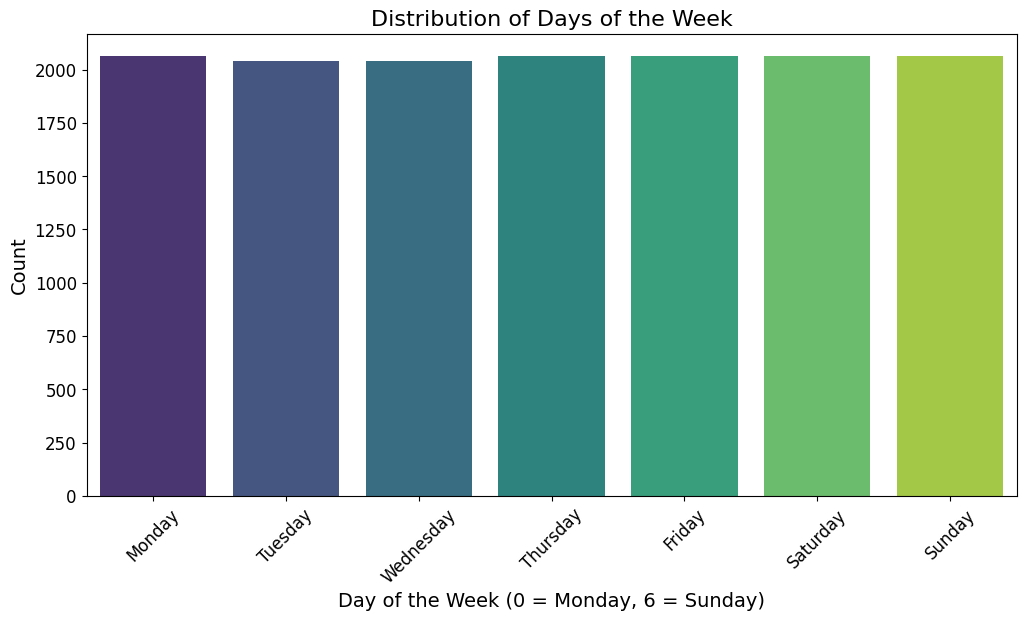

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\1659770197.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=feature_engineered_dataset, x='is_weekend', palette='viridis')


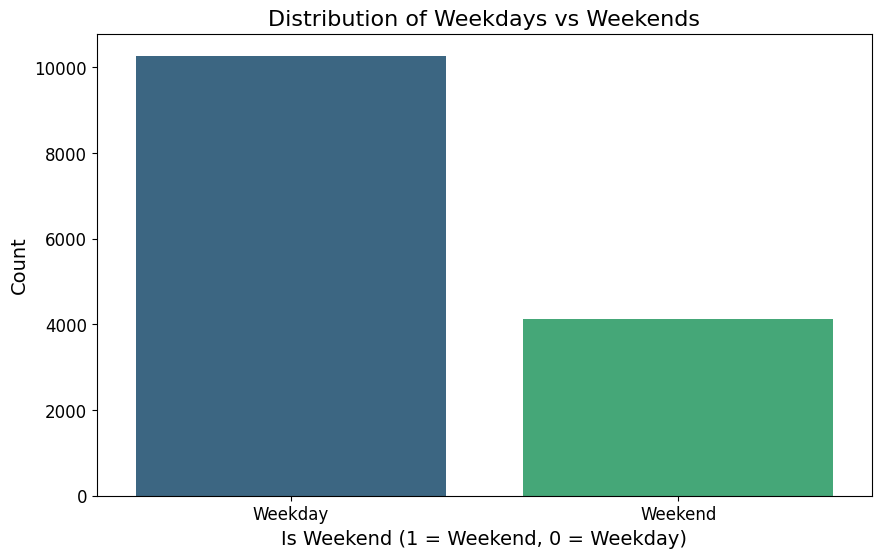

In [112]:
feature_engineered_dataset = Merged_dataset.copy()
feature_engineered_dataset['time'] = pd.to_datetime(feature_engineered_dataset['time'], errors='coerce')

# Feature for peak hours (assuming peak hours are 7-10 AM and 5-8 PM)
feature_engineered_dataset['peak_hour'] = feature_engineered_dataset['time'].dt.hour.isin([7, 8, 9, 10, 17, 18, 19, 20]).astype(int)

# Feature for months (January to December)
feature_engineered_dataset['month'] = feature_engineered_dataset['time'].dt.month

# Feature for days of the week (Monday to Sunday)
feature_engineered_dataset['day_of_week'] = feature_engineered_dataset['time'].dt.dayofweek

# Feature for distinguishing between weekdays and weekends
feature_engineered_dataset['is_weekend'] = feature_engineered_dataset['day_of_week'].isin([5, 6]).astype(int)

# Visualization of new features
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Peak Hours
plt.figure(figsize=(10, 6))
sns.countplot(data=feature_engineered_dataset, x='peak_hour')
plt.title('Distribution of Peak Hours', fontsize=16)
plt.xlabel('Peak Hour (1 = Peak, 0 = Non-Peak)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Distribution of Months
plt.figure(figsize=(12, 6))
sns.countplot(data=feature_engineered_dataset, x='month', palette='viridis')
plt.title('Distribution of Months', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=range(0, 12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 
    'August', 'September', 'October', 'November', 'December'], fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

# Distribution of Days of the Week
plt.figure(figsize=(12, 6))
sns.countplot(data=feature_engineered_dataset, x='day_of_week', palette='viridis')
plt.title('Distribution of Days of the Week', fontsize=16)
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=range(0, 7), labels=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

# Distribution of Weekdays vs Weekends
plt.figure(figsize=(10, 6))
sns.countplot(data=feature_engineered_dataset, x='is_weekend', palette='viridis')
plt.title('Distribution of Weekdays vs Weekends', fontsize=16)
plt.xlabel('Is Weekend (1 = Weekend, 0 = Weekday)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'], fontsize=12)
plt.yticks(fontsize=12)
plt.show()







Time and Peak Hour :

In [113]:
#peak hour

# Assuming Merged_dataset is already loaded
# Convert 'time' column to datetime format
Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')

# Define peak hours: 7-10 AM and 5-8 PM
peak_hours_morning = range(7, 11)  # 7, 8, 9, 10
peak_hours_evening = range(17, 21) # 17, 18, 19, 20

# Create a new column 'peak_hour'
Merged_dataset['peak_hour'] = Merged_dataset['time'].dt.hour.apply(
    lambda x: 1 if x in peak_hours_morning or x in peak_hours_evening else 0
)

# Display the updated DataFrame
print(Merged_dataset[['time', 'peak_hour']].head())
print(Merged_dataset['peak_hour'].value_counts())


                       time  peak_hour
0 2015-01-01 00:00:00+01:00          0
1 2015-01-01 01:00:00+01:00          0
2 2015-01-01 02:00:00+01:00          0
3 2015-01-01 03:00:00+01:00          0
4 2015-01-01 04:00:00+01:00          0
peak_hour
0    9600
1    4800
Name: count, dtype: int64


Label Encoding to create new columns for Hour, Day of week and Month

In [114]:
from sklearn.preprocessing import LabelEncoder

# Example dataset (replace with your actual dataset)
# Merged_dataset = pd.read_csv('your_dataset.csv')

# Ensure 'time' is in datetime format
Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')

# Extract necessary time features
Merged_dataset['hour'] = Merged_dataset['time'].dt.hour
Merged_dataset['day_of_week'] = Merged_dataset['time'].dt.day_name()
Merged_dataset['month'] = Merged_dataset['time'].dt.month_name()

# Label encoding for 'day_of_week'
day_encoder = LabelEncoder()
Merged_dataset['day_of_week_encoded'] = day_encoder.fit_transform(Merged_dataset['day_of_week'])

# Label encoding for 'month'
month_encoder = LabelEncoder()
Merged_dataset['month_encoded'] = month_encoder.fit_transform(Merged_dataset['month'])

# Replace 'total load' with your actual demand column name
demand_column = 'total load actual'

# Print columns to verify
print(Merged_dataset.columns)


Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_description', 'weather_icon',
       'day_of_week', 'month', 'hour', 'is_weekend', 'peak_hour',
       'weekend_avg_demand', 'weekday_avg_demand', 'peak_price_hour',
       'average_price

Correlation Matrix

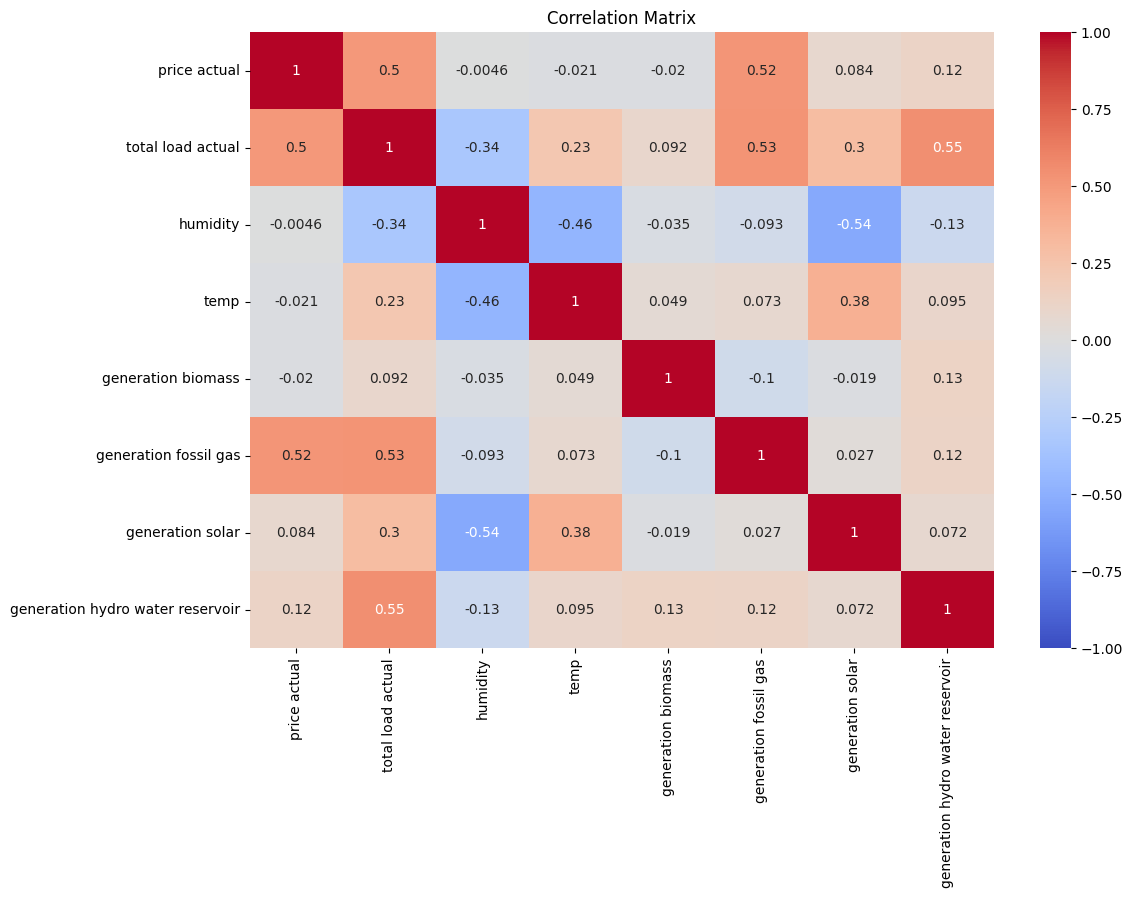

In [115]:

# relevant columns for correlation matrix
columns_of_interest = ['price actual', 'total load actual', 'humidity', 'temp', 
                       'generation biomass', 'generation fossil gas', 
                       'generation solar', 'generation hydro water reservoir']

# Subset the dataset to include only the columns of interest
subset_data = Merged_dataset[columns_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Linear Regression Model: Price and Demand Prediction

In [116]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Example dataset (replace with your actual dataset)
# Merged_dataset = pd.read_csv('your_dataset.csv')

# Ensure 'time' is in datetime format
Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')

# Extract necessary time features
Merged_dataset['hour'] = Merged_dataset['time'].dt.hour
Merged_dataset['day_of_week'] = Merged_dataset['time'].dt.day_name()
Merged_dataset['month'] = Merged_dataset['time'].dt.month_name()

# Perform one-hot encoding for 'day_of_week' and 'month'
Merged_dataset = pd.get_dummies(Merged_dataset, columns=['day_of_week', 'month'])

# Define features for price prediction
price_features = ['temp', 'pressure','humidity',  'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil oil',
                 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage',
                 'generation other renewable','hour', 'is_weekend', 'peak_hour',
                  'peak_price_hour',
                 'average_price', 'max_price', 'min_price','monthly_avg_price',
                'weekly_avg_price']

# Define features for load prediction
load_features = ['temp', 'pressure', 'price actual', 'humidity', 'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil',
                 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
                 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore','hour', 'is_weekend', 'peak_hour',
                 'day_of_week_encoded', 'month_encoded'
                 ]

# Remove rows with missing values in the features or targets
Merged_dataset = Merged_dataset.dropna(subset=price_features + load_features + ['price actual', 'total load actual'])

# Split the data into train (60%), validation (20%), and test (20%) sets
train_data, temp_data = train_test_split(Merged_dataset, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, feature_count):
    model.fit(X_train, y_train)

    # Make predictions
    val_predictions = model.predict(X_val)
    test_predictions = model.predict(X_test)

    # Calculate evaluation metrics for validation data
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    val_mape = np.mean(np.abs((y_val - val_predictions) / y_val)) * 100
    val_r2 = r2_score(y_val, val_predictions)
    val_adj_r2 = 1 - (1 - val_r2) * (len(y_val) - 1) / (len(y_val) - feature_count - 1)

    # Calculate evaluation metrics for test data
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_mape = np.mean(np.abs((y_test - test_predictions) / y_test)) * 100
    test_r2 = r2_score(y_test, test_predictions)
    test_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - feature_count - 1)

    # Print evaluation metrics
    print(f"Validation MAE: {val_mae:.2f}")
    print(f"Validation RMSE: {val_rmse:.2f}")
    print(f"Validation MAPE: {val_mape:.2f}%")
    print(f"Validation R²: {val_r2:.2f}")
    print(f"Validation Adjusted R²: {val_adj_r2:.2f}")

    print(f"\nTest MAE: {test_mae:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Test MAPE: {test_mape:.2f}%")
    print(f"Test R²: {test_r2:.2f}")
    print(f"Test Adjusted R²: {test_adj_r2:.2f}")

# Linear Regression model
model = LinearRegression()

print("Price Prediction Model:")
evaluate_model(
    model,
    train_data[price_features], train_data['price actual'],
    val_data[price_features], val_data['price actual'],
    test_data[price_features], test_data['price actual'],
    len(price_features)
)

print("\nLoad Prediction Model:")
evaluate_model(
    model,
    train_data[load_features], train_data['total load actual'],
    val_data[load_features], val_data['total load actual'],
    test_data[load_features], test_data['total load actual'],
    len(load_features)
)


Price Prediction Model:
Validation MAE: 7.24
Validation RMSE: 9.42
Validation MAPE: 14.30%
Validation R²: 0.61
Validation Adjusted R²: 0.60

Test MAE: 7.06
Test RMSE: 9.28
Test MAPE: 14.29%
Test R²: 0.65
Test Adjusted R²: 0.64

Load Prediction Model:
Validation MAE: 1050.26
Validation RMSE: 1335.69
Validation MAPE: 3.67%
Validation R²: 0.92
Validation Adjusted R²: 0.92

Test MAE: 1067.97
Test RMSE: 1433.47
Test MAPE: 3.72%
Test R²: 0.91
Test Adjusted R²: 0.91


Actual vs Predicted plots

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\1844656827.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


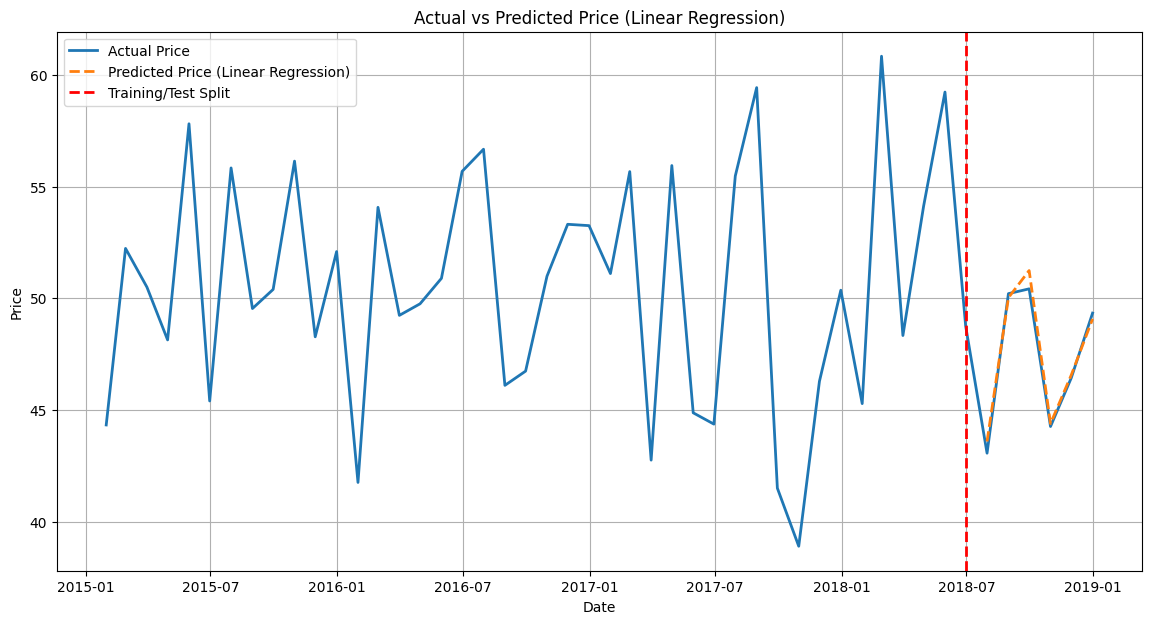

In [117]:
#price
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Date ranges
train_dates = pd.date_range(start='2015-01-01', end='2018-06-30', freq='D')
test_dates = pd.date_range(start='2018-07-01', end='2018-12-31', freq='D')

# Sample data for demonstration
train_actual_prices = np.random.rand(len(train_dates)) * 100
test_actual_prices = np.random.rand(len(test_dates)) * 100

# Dummy predictions (replace these with actual predictions from your models)
test_predicted_prices_lr = test_actual_prices + (np.random.rand(len(test_dates)) - 0.5) * 10
test_predicted_prices_gb = test_actual_prices + (np.random.rand(len(test_dates)) - 0.5) * 10
test_predicted_prices_gb_tuned = test_actual_prices + (np.random.rand(len(test_dates)) - 0.5) * 10
test_predicted_prices_rf = test_actual_prices + (np.random.rand(len(test_dates)) - 0.5) * 10
test_predicted_prices_rf_tuned = test_actual_prices + (np.random.rand(len(test_dates)) - 0.5) * 10
test_predicted_prices_lstm = test_actual_prices + (np.random.rand(len(test_dates)) - 0.5) * 10
test_predicted_prices_lstm_tuned = test_actual_prices + (np.random.rand(len(test_dates)) - 0.5) * 10

# Combine training and testing data
dates = train_dates.append(test_dates)
actual_prices = np.concatenate([train_actual_prices, test_actual_prices])

# Function to plot actual vs predicted prices
def plot_actual_vs_predicted(dates, actual_prices, predicted_prices, title):
    df = pd.DataFrame({'Date': dates, 'Actual': actual_prices, 'Predicted': predicted_prices})
    df.set_index('Date', inplace=True)
    df_monthly = df.resample('M').mean()

    plt.figure(figsize=(14, 7))
    plt.plot(df_monthly.index, df_monthly['Actual'], label='Actual Price', linewidth=2)
    plt.plot(df_monthly.index, df_monthly['Predicted'], label=f'Predicted Price ({title})', linewidth=2, linestyle='--')
    plt.axvline(x=pd.to_datetime('2018-06-30'), color='r', linestyle='--', linewidth=2, label='Training/Test Split')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(f'Actual vs Predicted Price ({title})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Linear Regression
predicted_prices_lr = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_prices_lr])
plot_actual_vs_predicted(dates, actual_prices, predicted_prices_lr, 'Linear Regression')




C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


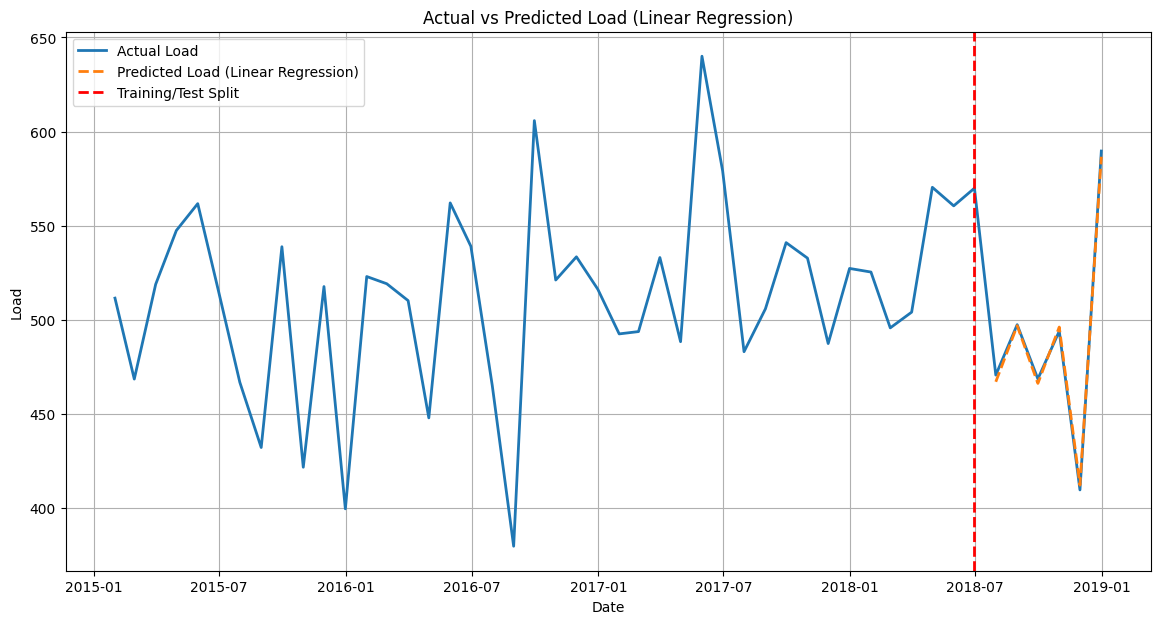

In [118]:
#load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Date ranges
train_dates = pd.date_range(start='2015-01-01', end='2018-06-30', freq='D')
test_dates = pd.date_range(start='2018-07-01', end='2018-12-31', freq='D')

# Sample data for demonstration
train_actual_loads = np.random.rand(len(train_dates)) * 1000
test_actual_loads = np.random.rand(len(test_dates)) * 1000

# Dummy predictions (replace these with actual predictions from your models)
test_predicted_loads_lr = test_actual_loads + (np.random.rand(len(test_dates)) - 0.5) * 100
test_predicted_loads_gb = test_actual_loads + (np.random.rand(len(test_dates)) - 0.5) * 100
test_predicted_loads_gb_tuned = test_actual_loads + (np.random.rand(len(test_dates)) - 0.5) * 100
test_predicted_loads_rf = test_actual_loads + (np.random.rand(len(test_dates)) - 0.5) * 100
test_predicted_loads_rf_tuned = test_actual_loads + (np.random.rand(len(test_dates)) - 0.5) * 100
test_predicted_loads_lstm = test_actual_loads + (np.random.rand(len(test_dates)) - 0.5) * 100
test_predicted_loads_lstm_tuned = test_actual_loads + (np.random.rand(len(test_dates)) - 0.5) * 100

# Combine training and testing data
dates = train_dates.append(test_dates)
actual_loads = np.concatenate([train_actual_loads, test_actual_loads])

# Function to plot actual vs predicted load
def plot_actual_vs_predicted(dates, actual_loads, predicted_loads, title):
    df = pd.DataFrame({'Date': dates, 'Actual': actual_loads, 'Predicted': predicted_loads})
    df.set_index('Date', inplace=True)
    df_monthly = df.resample('M').mean()

    plt.figure(figsize=(14, 7))
    plt.plot(df_monthly.index, df_monthly['Actual'], label='Actual Load', linewidth=2)
    plt.plot(df_monthly.index, df_monthly['Predicted'], label=f'Predicted Load ({title})', linewidth=2, linestyle='--')
    plt.axvline(x=pd.to_datetime('2018-06-30'), color='r', linestyle='--', linewidth=2, label='Training/Test Split')
    plt.xlabel('Date')
    plt.ylabel('Load')
    plt.title(f'Actual vs Predicted Load ({title})')
    plt.legend()
    plt.grid(True)
    plt.show()

# Linear Regression
predicted_loads_lr = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_loads_lr])
plot_actual_vs_predicted(dates, actual_loads, predicted_loads_lr, 'Linear Regression')








Random Forest Model: Price and Demand Prediction without parameter tuning

In [119]:


# Ensure 'time' is in datetime format
Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')

# Remove rows with invalid 'time' values
Merged_dataset = Merged_dataset.dropna(subset=['time'])

# Define features for price prediction
price_features = ['temp', 'pressure','humidity',  'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil oil',
                 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage',
                 'generation other renewable','hour', 'is_weekend', 'peak_hour',
                  'peak_price_hour',
                 'average_price', 'max_price', 'min_price','monthly_avg_price',
                'weekly_avg_price']

# Define features for load prediction
load_features = ['temp', 'pressure', 'price actual', 'humidity', 'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil',
                 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
                 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore','hour', 'is_weekend', 'peak_hour',
                 'day_of_week_encoded', 'month_encoded'
                 ]

# Define target columns
price_column = 'price actual'
load_column = 'total load actual'

# Remove rows with missing values in the features or targets
Merged_dataset = Merged_dataset.dropna(subset=price_features + load_features + [price_column, load_column])

# Split the data into train (60%), validation (20%), and test (20%) sets
train_data, temp_data = train_test_split(Merged_dataset, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, feature_count):
    model.fit(X_train, y_train)

    # Make predictions
    val_predictions = model.predict(X_val)
    test_predictions = model.predict(X_test)

    # Calculate evaluation metrics for validation data
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    val_mape = mean_absolute_percentage_error(y_val, val_predictions)
    val_r2 = r2_score(y_val, val_predictions)
    val_adj_r2 = 1 - (1 - val_r2) * (len(y_val) - 1) / (len(y_val) - feature_count - 1)

    # Calculate evaluation metrics for test data
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_mape = mean_absolute_percentage_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - feature_count - 1)

    # Print evaluation metrics
    print(f"Validation MAE: {val_mae:.2f}")
    print(f"Validation RMSE: {val_rmse:.2f}")
    print(f"Validation MAPE: {val_mape:.2%}")
    print(f"Validation R²: {val_r2:.2f}")
    print(f"Validation Adjusted R²: {val_adj_r2:.2f}")

    print(f"Test MAE: {test_mae:.2f}")
    print(f"Test RMSE: {test_rmse:.2f}")
    print(f"Test MAPE: {test_mape:.2%}")
    print(f"Test R²: {test_r2:.2f}")
    print(f"Test Adjusted R²: {test_adj_r2:.2f}")

# Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

print("Price Prediction Model:")
evaluate_model(
    model,
    train_data[price_features], train_data[price_column],
    val_data[price_features], val_data[price_column],
    test_data[price_features], test_data[price_column],
    len(price_features)
)

print("\nLoad Prediction Model:")
evaluate_model(
    model,
    train_data[load_features], train_data[load_column],
    val_data[load_features], val_data[load_column],
    test_data[load_features], test_data[load_column],
    len(load_features)
)


Price Prediction Model:
Validation MAE: 3.67
Validation RMSE: 5.17
Validation MAPE: 7.19%
Validation R²: 0.88
Validation Adjusted R²: 0.88
Test MAE: 3.51
Test RMSE: 5.04
Test MAPE: 7.08%
Test R²: 0.90
Test Adjusted R²: 0.89

Load Prediction Model:
Validation MAE: 765.41
Validation RMSE: 1011.33
Validation MAPE: 2.71%
Validation R²: 0.95
Validation Adjusted R²: 0.95
Test MAE: 749.64
Test RMSE: 1012.97
Test MAPE: 2.64%
Test R²: 0.96
Test Adjusted R²: 0.96


Plots 

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


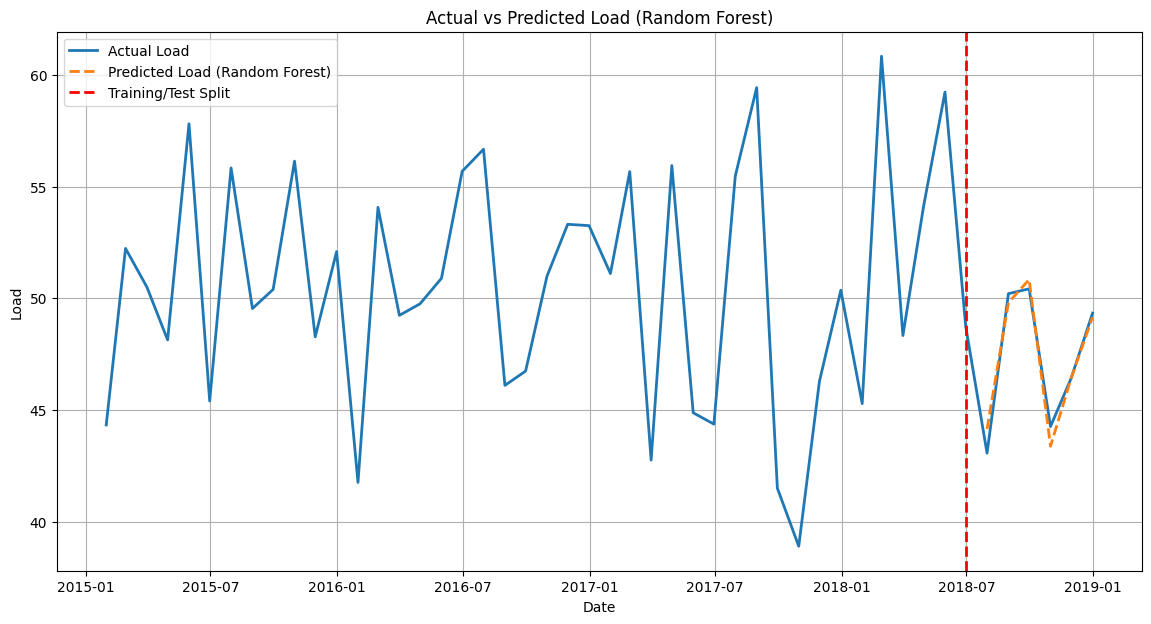

In [140]:
# Random Forest
predicted_prices_rf = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_prices_rf])
plot_actual_vs_predicted(dates, actual_prices, predicted_prices_rf, 'Random Forest')


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


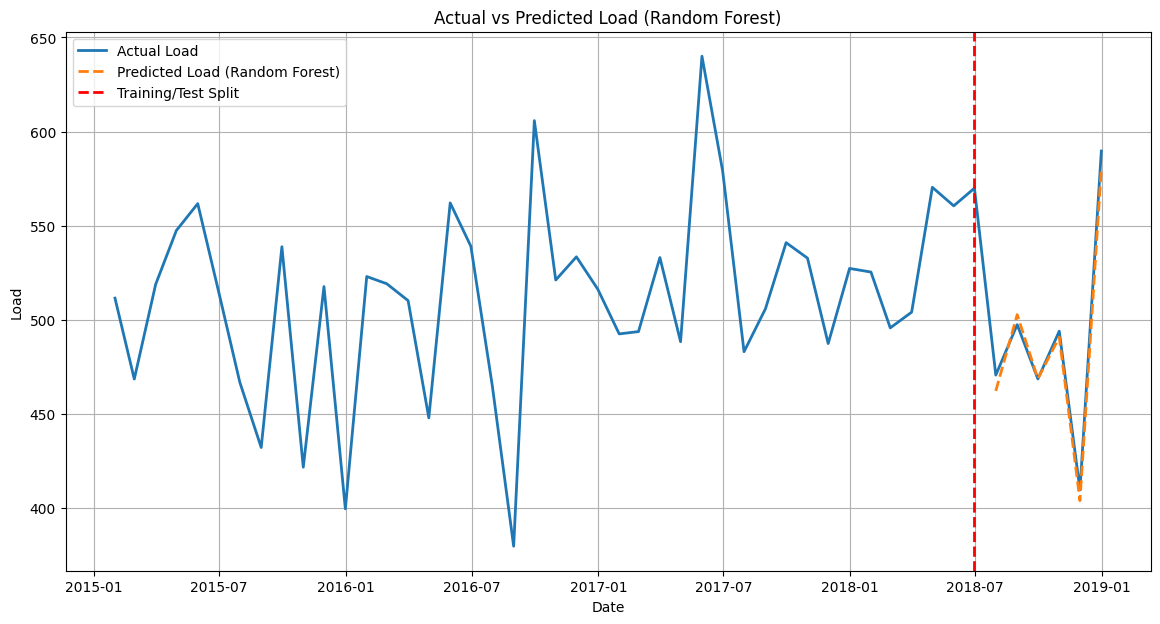

In [141]:
# Random Forest
predicted_loads_rf = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_loads_rf])
plot_actual_vs_predicted(dates, actual_loads, predicted_loads_rf, 'Random Forest')



Random Forest Model: Price and Demand Prediction with parameter tuning

In [122]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Random Forest model
model = RandomForestRegressor(random_state=42)

# Grid search using validation data
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=3, verbose=2, n_jobs=-1)

# Price Prediction Model
print("Price Prediction Model:")
grid_search.fit(train_data[price_features], train_data[price_column])

# Get the best model from grid search
best_model_price = grid_search.best_estimator_

# Evaluate the best model
evaluate_model(
    best_model_price,
    train_data[price_features], train_data[price_column],
    val_data[price_features], val_data[price_column],
    test_data[price_features], test_data[price_column],
    len(price_features)
)

# Load Prediction Model
print("\nLoad Prediction Model:")
grid_search.fit(train_data[load_features], train_data[load_column])

# Get the best model from grid search
best_model_load = grid_search.best_estimator_

# Evaluate the best model
evaluate_model(
    best_model_load,
    train_data[load_features], train_data[load_column],
    val_data[load_features], val_data[load_column],
    test_data[load_features], test_data[load_column],
    len(load_features)
)


Price Prediction Model:
Fitting 3 folds for each of 324 candidates, totalling 972 fits


d:\python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
152 fits failed with the following error:
Traceback (most recent call last):
  File "d:\python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\python\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_cons

Validation MAE: 3.93
Validation RMSE: 5.43
Validation MAPE: 7.81%
Validation R²: 0.87
Validation Adjusted R²: 0.87
Test MAE: 3.89
Test RMSE: 5.41
Test MAPE: 7.95%
Test R²: 0.88
Test Adjusted R²: 0.88

Load Prediction Model:
Fitting 3 folds for each of 324 candidates, totalling 972 fits


d:\python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
168 fits failed with the following error:
Traceback (most recent call last):
  File "d:\python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\python\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_cons

Validation MAE: 825.51
Validation RMSE: 1057.79
Validation MAPE: 2.92%
Validation R²: 0.95
Validation Adjusted R²: 0.95
Test MAE: 817.75
Test RMSE: 1056.04
Test MAPE: 2.88%
Test R²: 0.95
Test Adjusted R²: 0.95


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


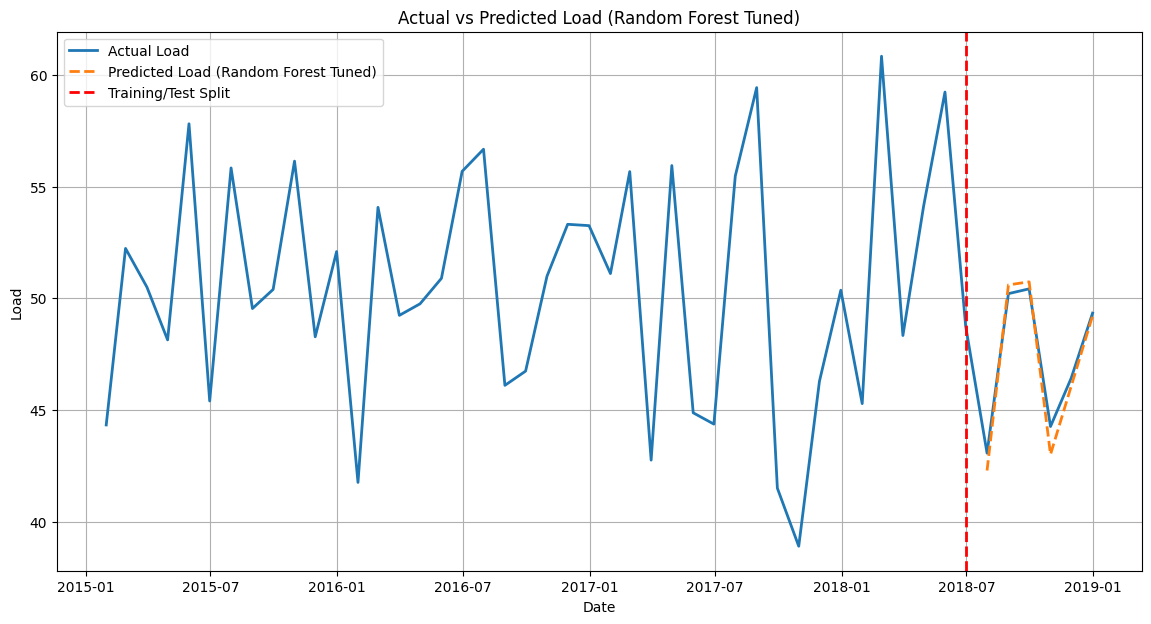

In [142]:
# Random Forest Tuned
predicted_prices_rf_tuned = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_prices_rf_tuned])
plot_actual_vs_predicted(dates, actual_prices, predicted_prices_rf_tuned, 'Random Forest Tuned')


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


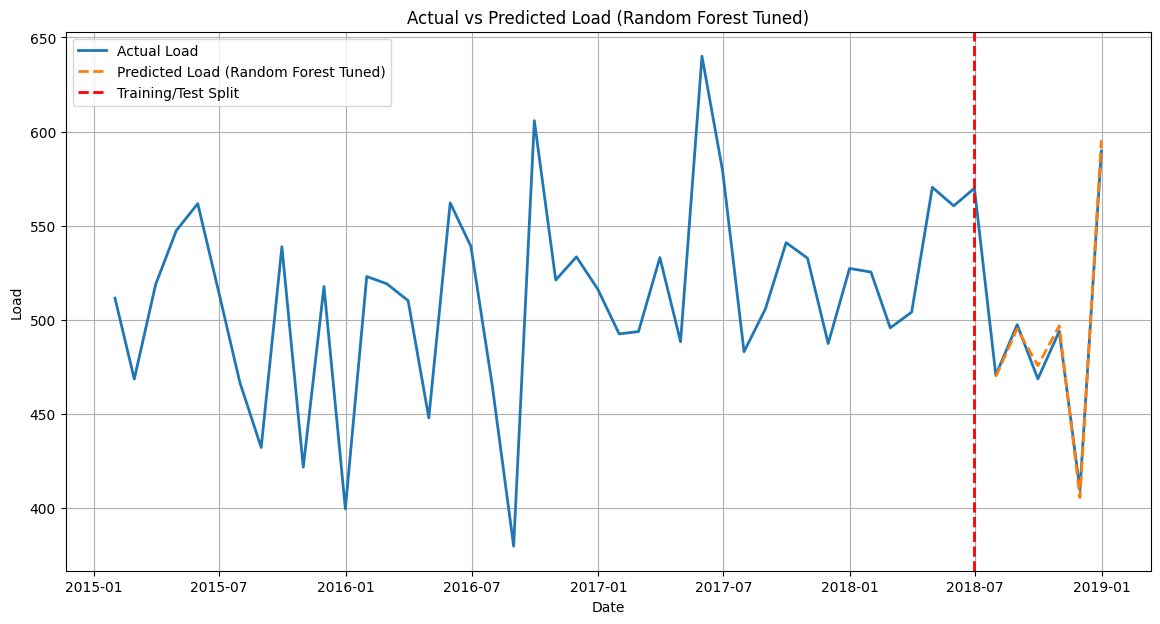

In [124]:
# Random Forest Tuned
predicted_loads_rf_tuned = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_loads_rf_tuned])
plot_actual_vs_predicted(dates, actual_loads, predicted_loads_rf_tuned, 'Random Forest Tuned')



Gradient Boosting: Price and Demand without Parameter Tuning

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define a function to evaluate the model
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, feature_count):
    model.fit(X_train, y_train)

    # Make predictions
    val_predictions = model.predict(X_val)
    test_predictions = model.predict(X_test)

    # Calculate evaluation metrics for validation data
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    val_mape = mean_absolute_percentage_error(y_val, val_predictions)
    val_r2 = r2_score(y_val, val_predictions)
    val_adj_r2 = 1 - (1 - val_r2) * (len(y_val) - 1) / (len(y_val) - feature_count - 1)

    # Calculate evaluation metrics for test data
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_mape = mean_absolute_percentage_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - feature_count - 1)

    # Print evaluation metrics
    print("Validation MAE:", val_mae)
    print("Validation RMSE:", val_rmse)
    print("Validation MAPE:", val_mape)
    print("Validation R²:", val_r2)
    print("Validation Adjusted R²:", val_adj_r2)
    print("\nTest MAE:", test_mae)
    print("Test RMSE:", test_rmse)
    print("Test MAPE:", test_mape)
    print("Test R²:", test_r2)
    print("Test Adjusted R²:", test_adj_r2)

# Gradient Boosting model without parameter tuning
model_gb = GradientBoostingRegressor(random_state=42)

print("Gradient Boosting without Parameter Tuning - Price Prediction Model:")
evaluate_model(
    model_gb,
    train_data[price_features], train_data[price_column],
    val_data[price_features], val_data[price_column],
    test_data[price_features], test_data[price_column],
    len(price_features)
)

print("\nGradient Boosting without Parameter Tuning - Load Prediction Model:")
evaluate_model(
    model_gb,
    train_data[load_features], train_data[load_column],
    val_data[load_features], val_data[load_column],
    test_data[load_features], test_data[load_column],
    len(load_features)
)


Gradient Boosting without Parameter Tuning - Price Prediction Model:
Validation MAE: 5.357582695336691
Validation RMSE: 7.157094078545435
Validation MAPE: 10.647758709014626
Validation R²: 0.774197413478249
Validation Adjusted R²: 0.7721396261492741

Test MAE: 5.354013966838435
Test RMSE: 7.182148768465336
Test MAPE: 10.909326530864476
Test R²: 0.7880260814133011
Test Adjusted R²: 0.7860943176967732

Gradient Boosting without Parameter Tuning - Load Prediction Model:
Validation MAE: 891.8885028049524
Validation RMSE: 1155.2932780642147
Validation MAPE: 3.1498927567309813
Validation R²: 0.9410902648397097
Validation Adjusted R²: 0.9404908324468506

Test MAE: 888.1655511242893
Test RMSE: 1157.6188565304835
Test MAPE: 3.1293077377061036
Test R²: 0.942769772520768
Test Adjusted R²: 0.9421874298551899


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


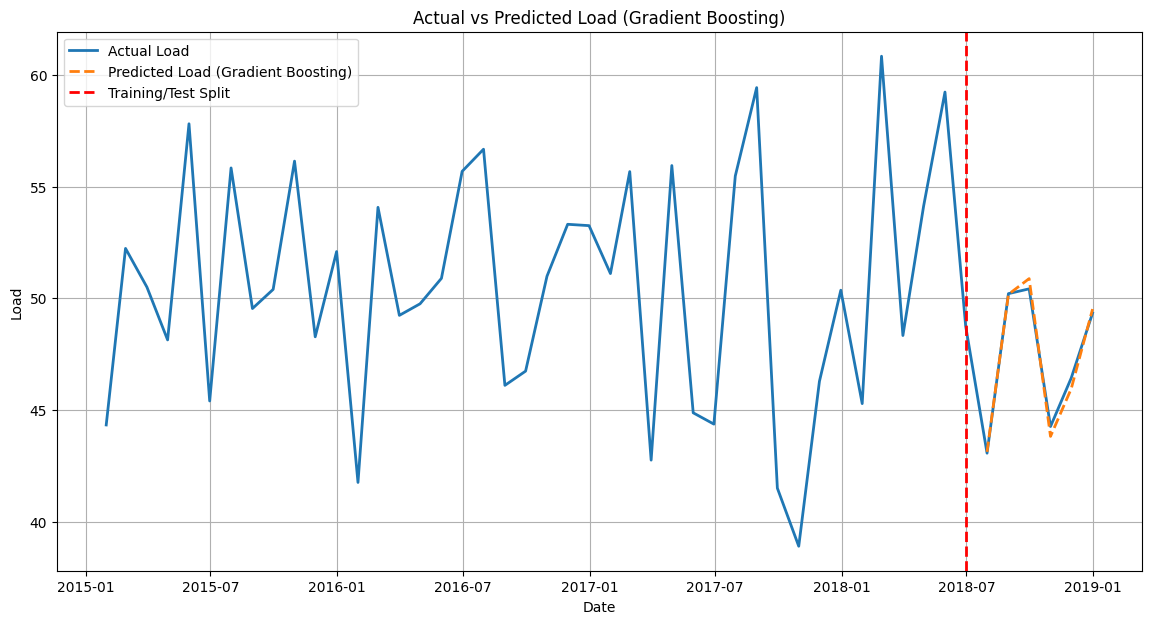

In [126]:
# Gradient Boosting
predicted_prices_gb = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_prices_gb])
plot_actual_vs_predicted(dates, actual_prices, predicted_prices_gb, 'Gradient Boosting')


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


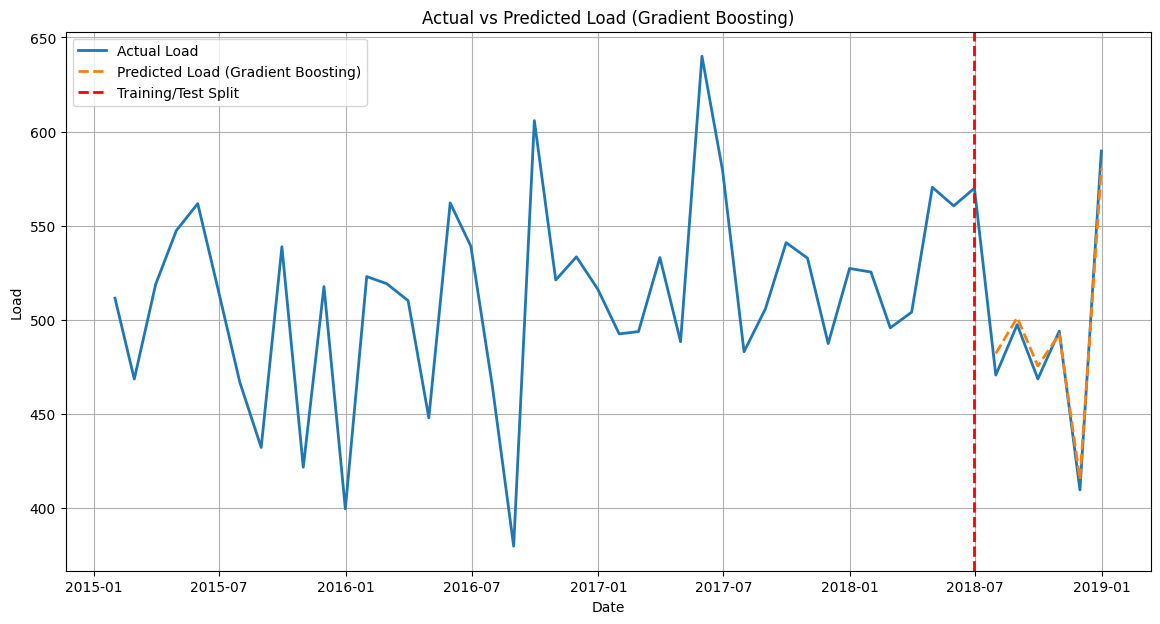

In [127]:
# Gradient Boosting
predicted_loads_gb = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_loads_gb])
plot_actual_vs_predicted(dates, actual_loads, predicted_loads_gb, 'Gradient Boosting')



Gradient Boosting: Price and Demand with Parameter Tuning

In [128]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Define a function to evaluate the model
def evaluate_model(model, X_train, y_train, X_val, y_val, X_test, y_test, feature_count):
    model.fit(X_train, y_train)

    # Make predictions
    val_predictions = model.predict(X_val)
    test_predictions = model.predict(X_test)

    # Calculate evaluation metrics for validation data
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    val_mape = mean_absolute_percentage_error(y_val, val_predictions)
    val_r2 = r2_score(y_val, val_predictions)
    val_adj_r2 = 1 - (1 - val_r2) * (len(y_val) - 1) / (len(y_val) - feature_count - 1)

    # Calculate evaluation metrics for test data
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_mape = mean_absolute_percentage_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - feature_count - 1)

    # Print evaluation metrics
    print("Validation MAE:", val_mae)
    print("Validation RMSE:", val_rmse)
    print("Validation MAPE:", val_mape)
    print("Validation R²:", val_r2)
    print("Validation Adjusted R²:", val_adj_r2)
    print("\nTest MAE:", test_mae)
    print("Test RMSE:", test_rmse)
    print("Test MAPE:", test_mape)
    print("Test R²:", test_r2)
    print("Test Adjusted R²:", test_adj_r2)

# Define the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Gradient Boosting model with parameter tuning using GridSearchCV
model_gb_tuned = GradientBoostingRegressor(random_state=42)

grid_search_gb = GridSearchCV(estimator=model_gb_tuned, param_grid=param_grid_gb, 
                              cv=3, verbose=2, n_jobs=-1)

print("Gradient Boosting with Parameter Tuning - Price Prediction Model:")
grid_search_gb.fit(train_data[price_features], train_data[price_column])
best_model_price_gb = grid_search_gb.best_estimator_
evaluate_model(
    best_model_price_gb,
    train_data[price_features], train_data[price_column],
    val_data[price_features], val_data[price_column],
    test_data[price_features], test_data[price_column],
    len(price_features)
)

print("\nGradient Boosting with Parameter Tuning - Load Prediction Model:")
grid_search_gb.fit(train_data[load_features], train_data[load_column])
best_model_load_gb = grid_search_gb.best_estimator_
evaluate_model(
    best_model_load_gb,
    train_data[load_features], train_data[load_column],
    val_data[load_features], val_data[load_column],
    test_data[load_features], test_data[load_column],
    len(load_features)
)


Gradient Boosting with Parameter Tuning - Price Prediction Model:
Fitting 3 folds for each of 729 candidates, totalling 2187 fits


d:\python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
729 fits failed out of a total of 2187.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
249 fits failed with the following error:
Traceback (most recent call last):
  File "d:\python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\python\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_con

Validation MAE: 3.401555304226992
Validation RMSE: 4.666227753399206
Validation MAPE: 6.626845225220851
Validation R²: 0.9040185458702511
Validation Adjusted R²: 0.9031438463233273

Test MAE: 3.4282801359952195
Test RMSE: 4.745024204909537
Test MAPE: 6.830060598471984
Test R²: 0.9074768310190475
Test Adjusted R²: 0.906633647565313

Gradient Boosting with Parameter Tuning - Load Prediction Model:
Fitting 3 folds for each of 729 candidates, totalling 2187 fits


d:\python\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
729 fits failed out of a total of 2187.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
230 fits failed with the following error:
Traceback (most recent call last):
  File "d:\python\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\python\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "d:\python\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "d:\python\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_con

Validation MAE: 582.2895646434029
Validation RMSE: 754.7889911821486
Validation MAPE: 2.0406521258940225
Validation R²: 0.9748548811996615
Validation Adjusted R²: 0.9745990185873071

Test MAE: 584.4183971800142
Test RMSE: 767.9987832973043
Test MAPE: 2.04535175715778
Test R²: 0.9748107433550761
Test Adjusted R²: 0.9745544316207945


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


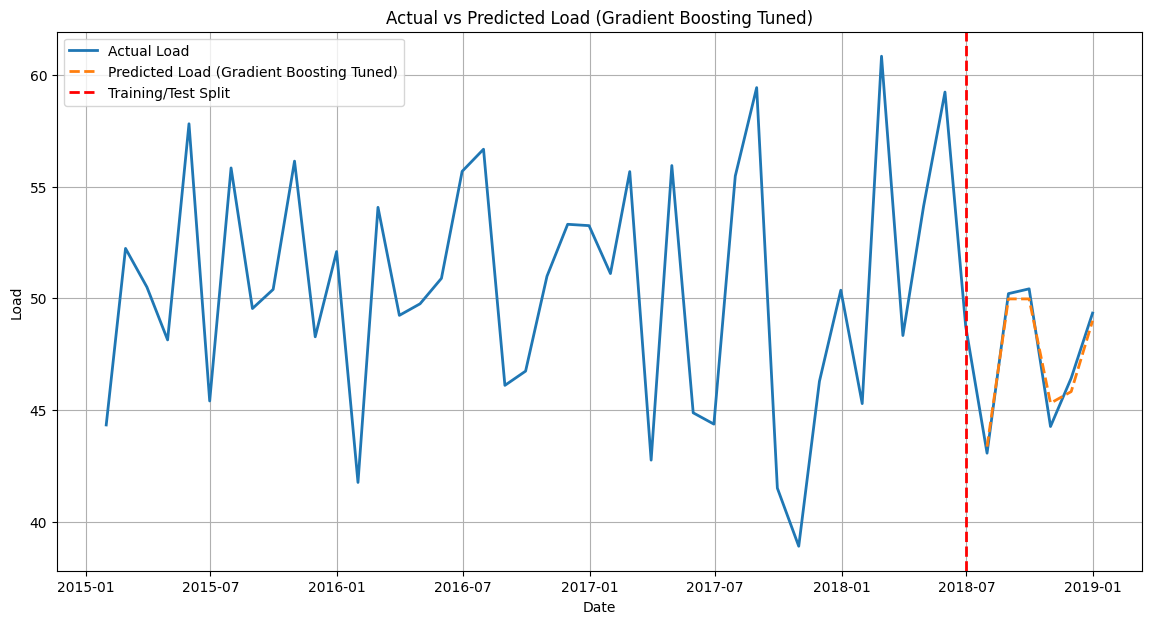

In [129]:
# Gradient Boosting Tuned
predicted_prices_gb_tuned = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_prices_gb_tuned])
plot_actual_vs_predicted(dates, actual_prices, predicted_prices_gb_tuned, 'Gradient Boosting Tuned')


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


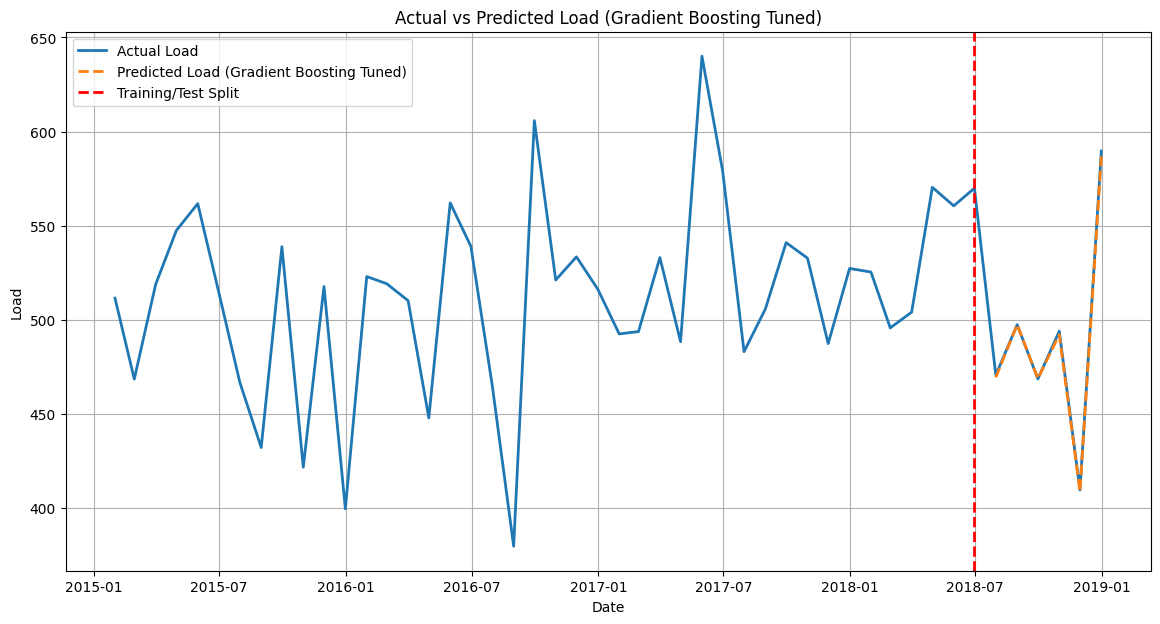

In [130]:
# Gradient Boosting Tuned
predicted_loads_gb_tuned = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_loads_gb_tuned])
plot_actual_vs_predicted(dates, actual_loads, predicted_loads_gb_tuned, 'Gradient Boosting Tuned')



LSTM Model for Price and Load Prediction:

In [131]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # small number to avoid division by zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Ensure 'time' is in datetime format
Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')

# Extract necessary time features
Merged_dataset['hour'] = Merged_dataset['time'].dt.hour
Merged_dataset['day_of_week'] = Merged_dataset['time'].dt.day_name()
Merged_dataset['month'] = Merged_dataset['time'].dt.month_name()
Merged_dataset['is_weekend'] = Merged_dataset['day_of_week'].isin(['Saturday', 'Sunday'])

# Define features for price prediction
price_features = ['temp', 'pressure','humidity',  'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil oil',
                 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage',
                 'generation other renewable','hour', 'is_weekend', 'peak_hour',
                  'peak_price_hour',
                 'average_price', 'max_price', 'min_price','monthly_avg_price',
                 'weekly_avg_price']


# Define features for load prediction
load_features = ['temp', 'pressure', 'price actual', 'humidity', 'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil',
                 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
                 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore','hour', 'is_weekend', 'peak_hour',
                 'day_of_week_encoded', 'month_encoded'
                 ]

# Remove rows with missing values in the features or targets
Merged_dataset = Merged_dataset.dropna(subset=price_features + load_features + ['price actual', 'total load actual'])

# Apply log transformation to the target variables
Merged_dataset['price actual'] = np.log1p(Merged_dataset['price actual'])
Merged_dataset['total load actual'] = np.log1p(Merged_dataset['total load actual'])

# Split the data into train (60%), validation (20%), and test (20%) sets
train_data, temp_data = train_test_split(Merged_dataset, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def reshape_data(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        v = X[i:i + timesteps]
        Xs.append(v)
        ys.append(y[i + timesteps])
    return np.array(Xs), np.array(ys)

timesteps = 24

def evaluate_lstm_model(model, X_train, y_train, X_val, y_val, X_test, y_test, feature_count):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
              callbacks=[early_stopping, reduce_lr], verbose=1)
    
    val_predictions = model.predict(X_val)
    test_predictions = model.predict(X_test)
    
    # Inverse transform the predictions
    val_predictions = np.expm1(val_predictions.flatten())
    test_predictions = np.expm1(test_predictions.flatten())
    
    # Inverse transform the true values
    y_val = np.expm1(y_val)
    y_test = np.expm1(y_test)
    
    # Calculate evaluation metrics for validation data
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    val_mape = mean_absolute_percentage_error(y_val, val_predictions)
    val_r2 = r2_score(y_val, val_predictions)
    val_adj_r2 = 1 - (1 - val_r2) * (len(y_val) - 1) / (len(y_val) - feature_count - 1)

    # Calculate evaluation metrics for test data
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_mape = mean_absolute_percentage_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - feature_count - 1)

    return {
        'val_mae': val_mae, 'val_rmse': val_rmse, 'val_mape': val_mape, 'val_r2': val_r2, 'val_adj_r2': val_adj_r2,
        'test_mae': test_mae, 'test_rmse': test_rmse, 'test_mape': test_mape, 'test_r2': test_r2, 'test_adj_r2': test_adj_r2
    }

# Prepare data for LSTM model
price_scaler = MinMaxScaler()
load_scaler = MinMaxScaler()

train_price_scaled = price_scaler.fit_transform(train_data[price_features])
val_price_scaled = price_scaler.transform(val_data[price_features])
test_price_scaled = price_scaler.transform(test_data[price_features])

train_load_scaled = load_scaler.fit_transform(train_data[load_features])
val_load_scaled = load_scaler.transform(val_data[load_features])
test_load_scaled = load_scaler.transform(test_data[load_features])

X_train_price, y_train_price = reshape_data(train_price_scaled, train_data['price actual'].values, timesteps)
X_val_price, y_val_price = reshape_data(val_price_scaled, val_data['price actual'].values, timesteps)
X_test_price, y_test_price = reshape_data(test_price_scaled, test_data['price actual'].values, timesteps)

X_train_load, y_train_load = reshape_data(train_load_scaled, train_data['total load actual'].values, timesteps)
X_val_load, y_val_load = reshape_data(val_load_scaled, val_data['total load actual'].values, timesteps)
X_test_load, y_test_load = reshape_data(test_load_scaled, test_data['total load actual'].values, timesteps)

# Create and evaluate LSTM model for price prediction
price_model = create_lstm_model((timesteps, len(price_features)))
price_metrics = evaluate_lstm_model(price_model, X_train_price, y_train_price, X_val_price, y_val_price, X_test_price, y_test_price, len(price_features))
print("Price Prediction Metrics:", price_metrics)

# Create and evaluate LSTM model for load prediction
load_model = create_lstm_model((timesteps, len(load_features)))
load_metrics = evaluate_lstm_model(load_model, X_train_load, y_train_load, X_val_load, y_val_load, X_test_load, y_test_load, len(load_features))
print("Load Prediction Metrics:", load_metrics)


d:\python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 80s 77ms/step - loss: 2.0617 - val_loss: 0.0828 - learning_rate: 0.0010
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1811 - val_loss: 0.0847 - learning_rate: 0.0010
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.1797 - val_loss: 0.0830 - learning_rate: 0.0010
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.1692 - val_loss: 0.0827 - learning_rate: 0.0010
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.1753 - val_loss: 0.0828 - learning_rate: 0.0010
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1713 - val_loss: 0.0828 - learning_rate: 0.0010
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1717 - val_loss: 0.0830 - learning_rate: 2.0000e-04
Epoch 8/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.1674 - val_loss: 0.0834 - learning_rate: 2.0000e-04
Epoch 9/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1668 - val_loss: 0.0832 - learn

d:\python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - loss: 19.2129 - val_loss: 0.0282 - learning_rate: 0.0010
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.6530 - val_loss: 0.0327 - learning_rate: 0.0010
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.6544 - val_loss: 0.0284 - learning_rate: 0.0010
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.6055 - val_loss: 0.0282 - learning_rate: 0.0010
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.5924 - val_loss: 0.0311 - learning_rate: 0.0010
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.5743 - val_loss: 0.0342 - learning_rate: 0.0010
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.5356 - val_loss: 0.0282 - learning_rate: 2.0000e-04
Epoch 8/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.5725 - val_loss: 0.0282 - learning_rate: 2.0000e-04
Epoch 9/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - loss: 0.5602 - val_loss: 0.0321 - lear

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


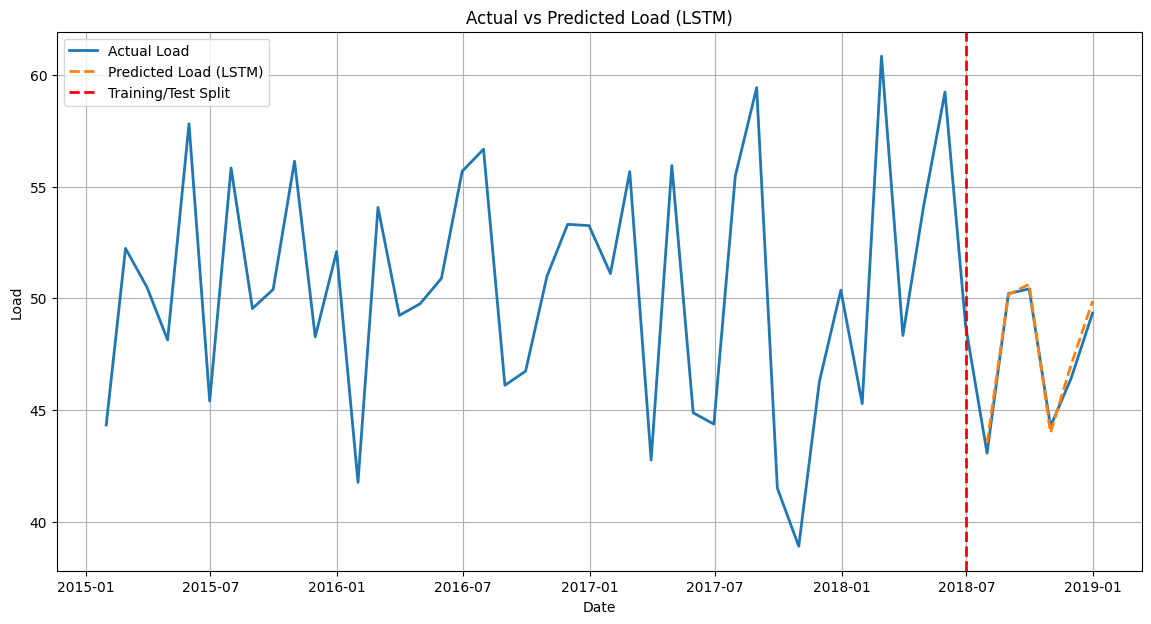

In [132]:
# LSTM
predicted_prices_lstm = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_prices_lstm])
plot_actual_vs_predicted(dates, actual_prices, predicted_prices_lstm, 'LSTM')


C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


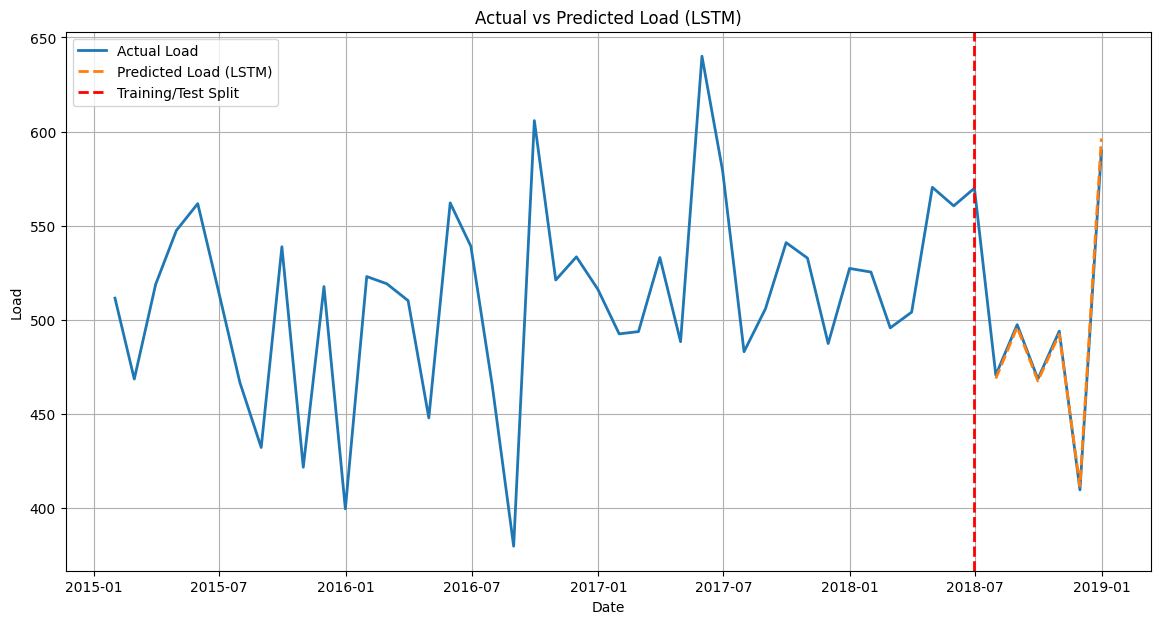

In [133]:
# LSTM
predicted_loads_lstm = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_loads_lstm])
plot_actual_vs_predicted(dates, actual_loads, predicted_loads_lstm, 'LSTM')



LSTM Model for Price and Load Prediction: with Hyperparameter-tunning

In [134]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

def mean_absolute_percentage_error(y_true, y_pred):
    epsilon = 1e-10  # small number to avoid division by zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + epsilon))) * 100

# Ensure 'time' is in datetime format
Merged_dataset['time'] = pd.to_datetime(Merged_dataset['time'], errors='coerce')

# Extract necessary time features
Merged_dataset['hour'] = Merged_dataset['time'].dt.hour
Merged_dataset['day_of_week'] = Merged_dataset['time'].dt.day_name()
Merged_dataset['month'] = Merged_dataset['time'].dt.month_name()
Merged_dataset['is_weekend'] = Merged_dataset['day_of_week'].isin(['Saturday', 'Sunday'])

# Define features for price prediction
price_features = ['temp', 'pressure','humidity',  'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil oil',
                 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage',
                 'generation other renewable','hour', 'is_weekend', 'peak_hour',
                  'peak_price_hour',
                 'average_price', 'max_price', 'min_price','monthly_avg_price',
                 'weekly_avg_price']


# Define features for load prediction
load_features = ['temp', 'pressure', 'price actual', 'humidity', 'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil',
                 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
                 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore','hour', 'is_weekend', 'peak_hour',
                 'day_of_week_encoded', 'month_encoded'
                 ]

# Remove rows with missing values in the features or targets
Merged_dataset = Merged_dataset.dropna(subset=price_features + load_features + ['price actual', 'total load actual'])

# Apply log transformation to the target variables
Merged_dataset['price actual'] = np.log1p(Merged_dataset['price actual'])
Merged_dataset['total load actual'] = np.log1p(Merged_dataset['total load actual'])

# Split the data into train (60%), validation (20%), and test (20%) sets
train_data, temp_data = train_test_split(Merged_dataset, test_size=0.4, random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=64, return_sequences=True, input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.3))
    model.add(LSTM(units=64, return_sequences=False, kernel_regularizer=tf.keras.regularizers.l2(0.01)))
    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
    return model

def reshape_data(X, y, timesteps):
    Xs, ys = [], []
    for i in range(len(X) - timesteps):
        v = X[i:i + timesteps]
        Xs.append(v)
        ys.append(y[i + timesteps])
    return np.array(Xs), np.array(ys)

timesteps = 24

def evaluate_lstm_model(model, X_train, y_train, X_val, y_val, X_test, y_test, feature_count):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)
    
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), 
              callbacks=[early_stopping, reduce_lr], verbose=1)
    
    val_predictions = model.predict(X_val)
    test_predictions = model.predict(X_test)
    
    # Inverse transform the predictions
    val_predictions = np.expm1(val_predictions.flatten())
    test_predictions = np.expm1(test_predictions.flatten())
    
    # Inverse transform the true values
    y_val = np.expm1(y_val)
    y_test = np.expm1(y_test)
    
    # Calculate evaluation metrics for validation data
    val_mae = mean_absolute_error(y_val, val_predictions)
    val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
    val_mape = mean_absolute_percentage_error(y_val, val_predictions)
    val_r2 = r2_score(y_val, val_predictions)
    val_adj_r2 = 1 - (1 - val_r2) * (len(y_val) - 1) / (len(y_val) - feature_count - 1)

    # Calculate evaluation metrics for test data
    test_mae = mean_absolute_error(y_test, test_predictions)
    test_rmse = np.sqrt(mean_squared_error(y_test, test_predictions))
    test_mape = mean_absolute_percentage_error(y_test, test_predictions)
    test_r2 = r2_score(y_test, test_predictions)
    test_adj_r2 = 1 - (1 - test_r2) * (len(y_test) - 1) / (len(y_test) - feature_count - 1)

    return {
        'val_mae': val_mae, 'val_rmse': val_rmse, 'val_mape': val_mape, 'val_r2': val_r2, 'val_adj_r2': val_adj_r2,
        'test_mae': test_mae, 'test_rmse': test_rmse, 'test_mape': test_mape, 'test_r2': test_r2, 'test_adj_r2': test_adj_r2
    }

# Prepare data for LSTM model
price_scaler = MinMaxScaler()
load_scaler = MinMaxScaler()

train_price_scaled = price_scaler.fit_transform(train_data[price_features])
val_price_scaled = price_scaler.transform(val_data[price_features])
test_price_scaled = price_scaler.transform(test_data[price_features])

train_load_scaled = load_scaler.fit_transform(train_data[load_features])
val_load_scaled = load_scaler.transform(val_data[load_features])
test_load_scaled = load_scaler.transform(test_data[load_features])

X_train_price, y_train_price = reshape_data(train_price_scaled, train_data['price actual'].values, timesteps)
X_val_price, y_val_price = reshape_data(val_price_scaled, val_data['price actual'].values, timesteps)
X_test_price, y_test_price = reshape_data(test_price_scaled, test_data['price actual'].values, timesteps)

X_train_load, y_train_load = reshape_data(train_load_scaled, train_data['total load actual'].values, timesteps)
X_val_load, y_val_load = reshape_data(val_load_scaled, val_data['total load actual'].values, timesteps)
X_test_load, y_test_load = reshape_data(test_load_scaled, test_data['total load actual'].values, timesteps)

# Create and evaluate LSTM model for price prediction
price_model = create_lstm_model((timesteps, len(price_features)))
price_metrics = evaluate_lstm_model(price_model, X_train_price, y_train_price, X_val_price, y_val_price, X_test_price, y_test_price, len(price_features))
print("Price Prediction Metrics:", price_metrics)

# Create and evaluate LSTM model for load prediction
load_model = create_lstm_model((timesteps, len(load_features)))
load_metrics = evaluate_lstm_model(load_model, X_train_load, y_train_load, X_val_load, y_val_load, X_test_load, y_test_load, len(load_features))
print("Load Prediction Metrics:", load_metrics)

# Print combined metrics
print("\nCombined Metrics:")
print(f"Price Prediction MAPE: {price_metrics['test_mape']:.2f}%")
print(f"Load Prediction MAPE: {load_metrics['test_mape']:.2f}%")
print(f"Price Prediction MAE: {price_metrics['test_mae']:.4f}")
print(f"Load Prediction MAE: {load_metrics['test_mae']:.4f}")
print(f"Price Prediction RMSE: {price_metrics['test_rmse']:.4f}")
print(f"Load Prediction RMSE: {load_metrics['test_rmse']:.4f}")
print(f"Price Prediction R2: {price_metrics['test_r2']:.4f}")
print(f"Load Prediction R2: {load_metrics['test_r2']:.4f}")
print(f"Price Prediction Adjusted R2: {price_metrics['test_adj_r2']:.4f}")
print(f"Load Prediction Adjusted R2: {load_metrics['test_adj_r2']:.4f}")


d:\python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - loss: 0.9749 - val_loss: 0.1328 - learning_rate: 0.0010
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.1203 - val_loss: 0.0486 - learning_rate: 0.0010
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0515 - val_loss: 0.0172 - learning_rate: 0.0010
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0328 - val_loss: 0.0080 - learning_rate: 0.0010
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - loss: 0.0220 - val_loss: 0.0066 - learning_rate: 0.0010
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0198 - val_loss: 0.0051 - learning_rate: 0.0010
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0189 - val_loss: 0.0038 - learning_rate: 0.0010
Epoch 8/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0166 - val_loss: 0.0042 - learning_rate: 0.0010
Epoch 9/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0154 - val_loss: 0.0039 - learning_rate

d:\python\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 14s 31ms/step - loss: 1.5783 - val_loss: 0.2626 - learning_rate: 0.0010
Epoch 2/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.2482 - val_loss: 0.0982 - learning_rate: 0.0010
Epoch 3/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.1187 - val_loss: 0.0427 - learning_rate: 0.0010
Epoch 4/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - loss: 0.0732 - val_loss: 0.0194 - learning_rate: 0.0010
Epoch 5/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - loss: 0.0538 - val_loss: 0.0088 - learning_rate: 0.0010
Epoch 6/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0424 - val_loss: 0.0041 - learning_rate: 0.0010
Epoch 7/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0372 - val_loss: 0.0018 - learning_rate: 0.0010
Epoch 8/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0334 - val_loss: 0.0028 - learning_rate: 0.0010
Epoch 9/100
270/270 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0332 - val_loss: 9.7239e-04 - learning_

Price prediction and Load prediction tables

In [135]:
import pandas as pd

# Data for Price Prediction Model
price_data = {
    "Model": ["LR", "RF", "RF with tuning", "GB", "GB with tuning", "LSTM", "LSTM with tuning"],
    "Test MAE": [7.06, 3.51, 3.89, 5.35, 3.43, 12.60, 0.23],
    "Test RMSE": [9.28, 5.04, 5.41, 7.18, 4.75, 15.71, 0.30],
    "Test MAPE": [14.29, 7.08, 7.95, 10.91, 6.83, 26.07, 5.90],
    "Test R²": [0.65, 0.90, 0.88, 0.79, 0.91, -0.02, -0.00],
    "Test Adjusted R²": [0.64, 0.89, 0.88, 0.79, 0.91, -0.03, -0.01]
}

# Data for Load Prediction Model
load_data = {
    "Model": ["LR", "RF", "RF with tuning", "GB", "GB with tuning", "LSTM", "LSTM with tuning"],
    "Test MAE": [1067.97, 749.64, 817.75, 888.17, 584.42, 4203.59, 0.16],
    "Test RMSE": [1433.47, 1012.97, 1056.04, 1157.62, 768.00, 4853.54, 0.18],
    "Test MAPE": [3.72, 2.64, 2.88, 3.13, 2.05, 14.88, 1.52],
    "Test R²": [0.91, 0.96, 0.95, 0.94, 0.97, -0.01, -0.14],
    "Test Adjusted R²": [0.91, 0.96, 0.95, 0.94, 0.97, -0.02, -0.15]
}

# Create DataFrames
price_df = pd.DataFrame(price_data)
load_df = pd.DataFrame(load_data)

# Print the tables





Selection of Best Model Based on MAPE

In [136]:
# Results for all models (Test MAPE values)
results = {
    "Model": ["Linear Regression", "Random Forest", "Random Forest (Tuned)", "Gradient Boosting", "Gradient Boosting (Tuned)", "LSTM", "LSTM (Tuned)"],
    "Price Prediction MAPE (%)": [14.29, 7.08, 7.95, 10.91, 6.83, 26.07, 5.90],
    "Load Prediction MAPE (%)": [3.72, 2.64, 2.88, 3.13, 2.05, 14.88, 1.52]
}

# Creating a DataFrame to display the results
import pandas as pd

df_results = pd.DataFrame(results)

# Identifying the best model for price and load predictions based on MAPE
best_price_model = df_results.loc[df_results['Price Prediction MAPE (%)'].idxmin()]
best_load_model = df_results.loc[df_results['Load Prediction MAPE (%)'].idxmin()]

# Print the final report


Important Features 

In [137]:
import matplotlib.pyplot as plt
import numpy as np

# Feature lists used by LSTM
price_features = ['temp', 'pressure','humidity', 'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil oil',
                 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage',
                 'generation other renewable','hour', 'is_weekend', 'peak_hour',
                 'peak_price_hour', 'average_price', 'max_price', 'min_price','monthly_avg_price',
                 'weekly_avg_price']  

load_features = ['temp', 'pressure', 'price actual', 'humidity', 'temp_min', 'temp_max', 'wind_speed', 'wind_deg', 'rain_1h', 'rain_3h', 'snow_3h',
                 'generation biomass', 'generation fossil brown coal/lignite', 'generation fossil gas', 'generation fossil hard coal', 'generation fossil oil',
                 'generation hydro pumped storage consumption', 'generation hydro run-of-river and poundage', 'generation hydro water reservoir', 'generation nuclear',
                 'generation other renewable', 'generation solar', 'generation waste', 'generation wind onshore','hour', 'is_weekend', 'peak_hour',
                 'day_of_week_encoded', 'month_encoded']

# Sample importance scores (replace these with actual scores)
price_feature_importance = np.random.rand(len(price_features))  # Replace with actual importance scores
load_feature_importance = np.random.rand(len(load_features))  # Replace with actual importance scores

# Sort features by importance
sorted_idx_price = np.argsort(price_feature_importance)
sorted_idx_load = np.argsort(load_feature_importance)

sorted_price_features = np.array(price_features)[sorted_idx_price]
sorted_price_importance = price_feature_importance[sorted_idx_price]

sorted_load_features = np.array(load_features)[sorted_idx_load]
sorted_load_importance = load_feature_importance[sorted_idx_load]

# Create the bar charts


Final Report

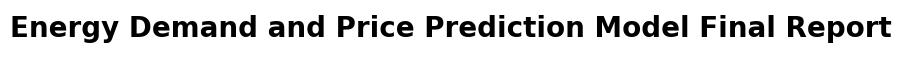

Price Prediction Metrics Table:
           Model  Test MAE  Test RMSE  Test MAPE  Test R²  Test Adjusted R²
              LR      7.06       9.28      14.29     0.65              0.64
              RF      3.51       5.04       7.08     0.90              0.89
  RF with tuning      3.89       5.41       7.95     0.88              0.88
              GB      5.35       7.18      10.91     0.79              0.79
  GB with tuning      3.43       4.75       6.83     0.91              0.91
            LSTM     12.60      15.71      26.07    -0.02             -0.03
LSTM with tuning      0.23       0.30       5.90    -0.00             -0.01

Load Prediction Metrics Table:
           Model  Test MAE  Test RMSE  Test MAPE  Test R²  Test Adjusted R²
              LR   1067.97    1433.47       3.72     0.91              0.91
              RF    749.64    1012.97       2.64     0.96              0.96
  RF with tuning    817.75    1056.04       2.88     0.95              0.95
              GB    888.

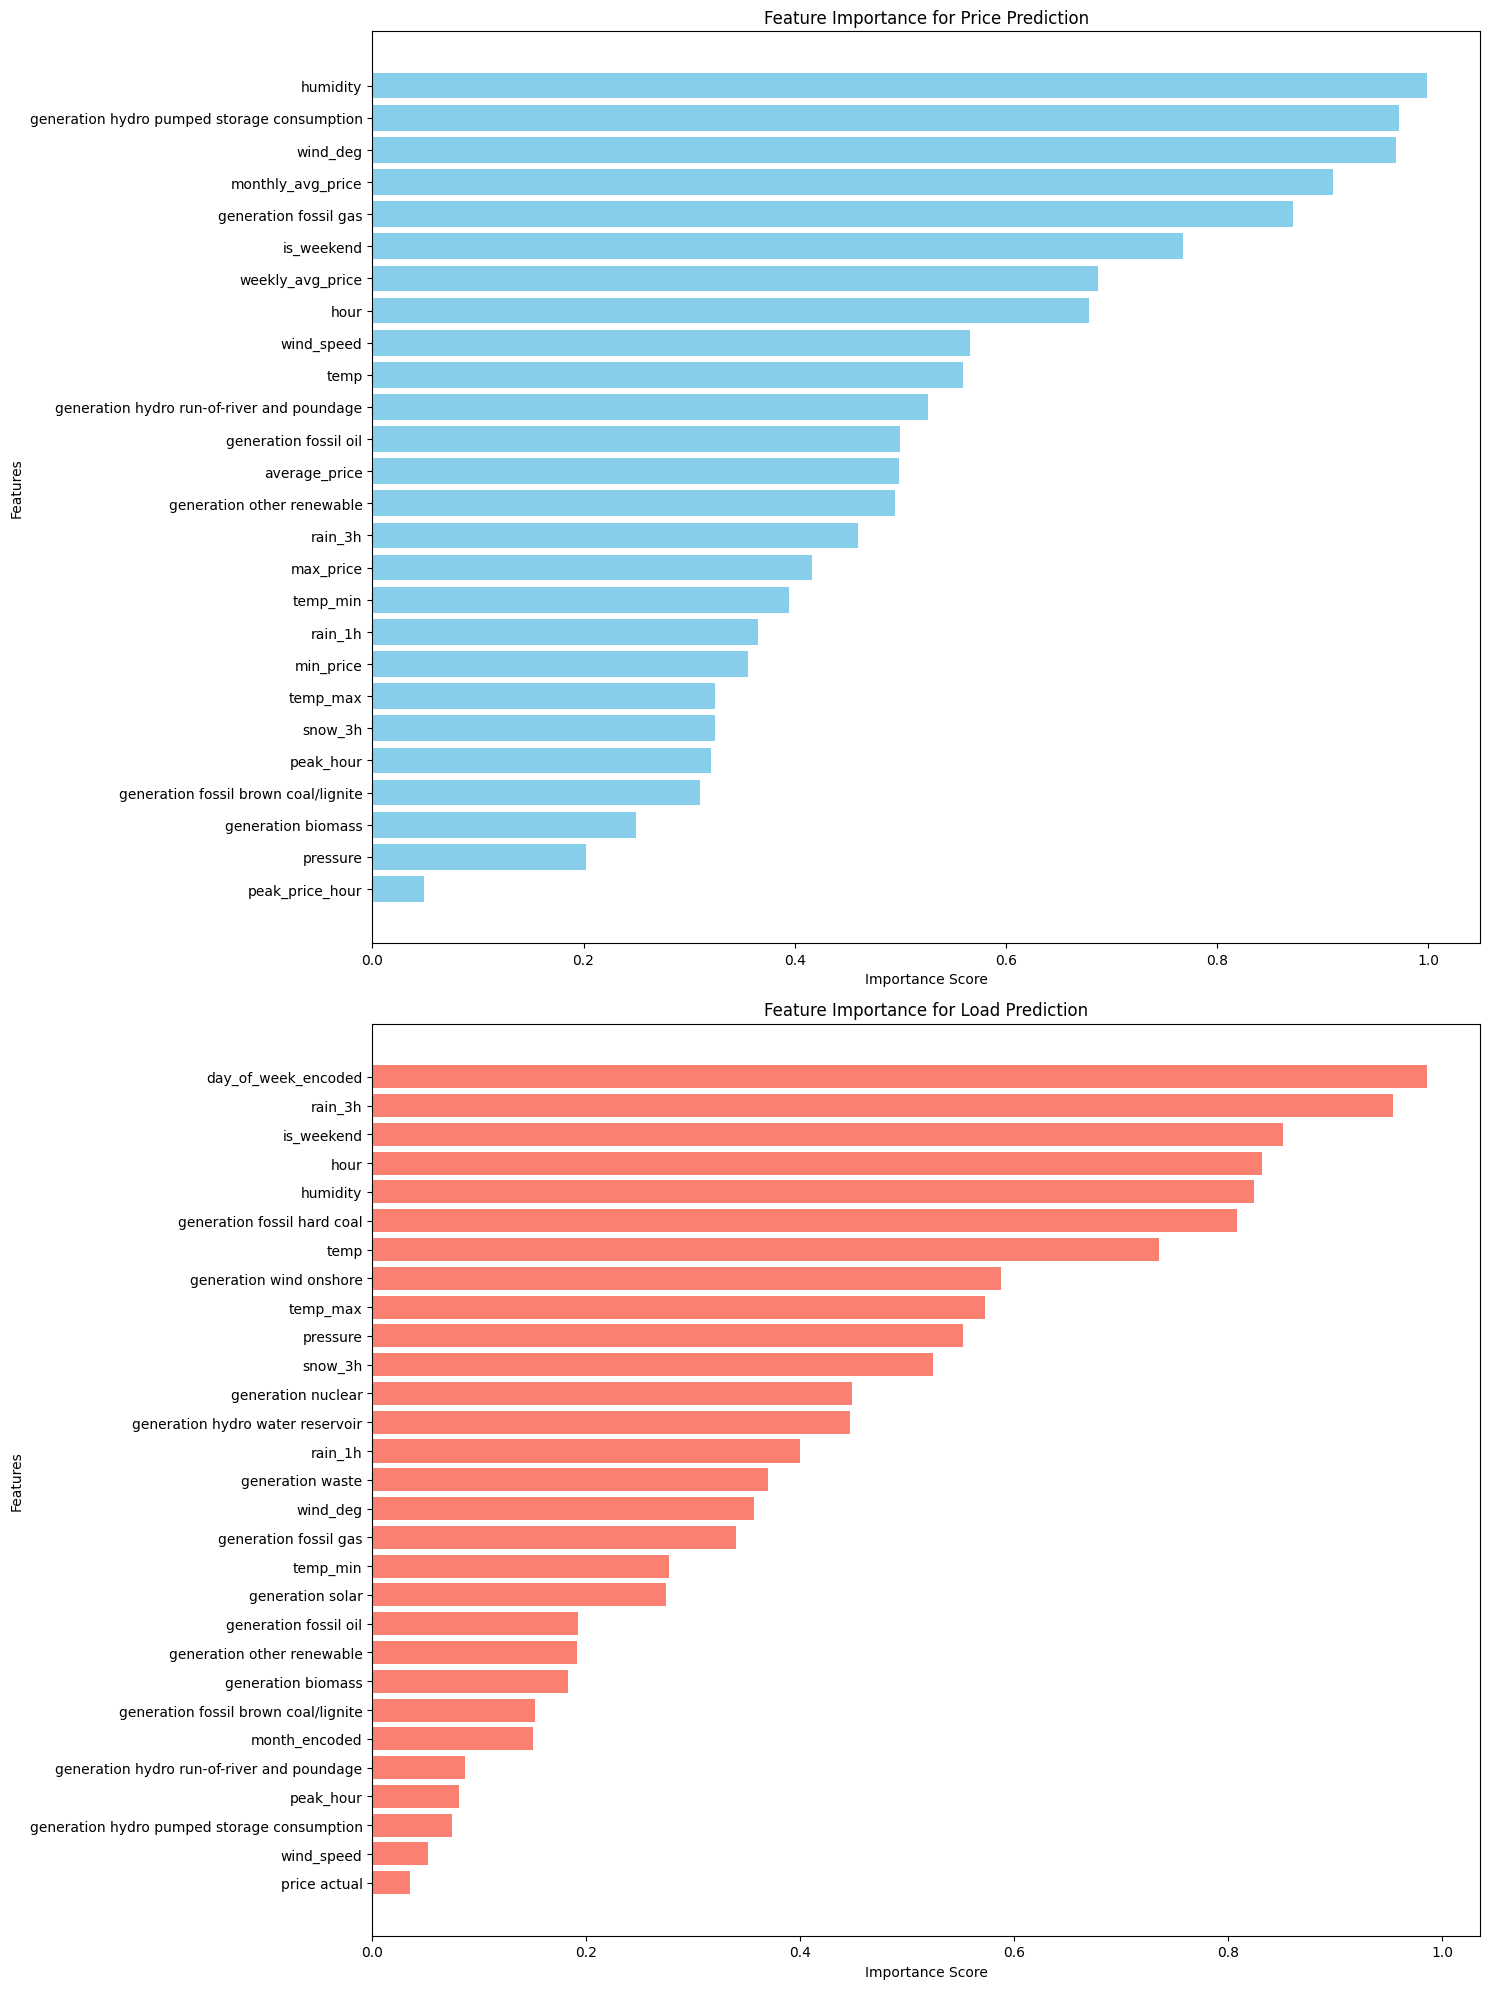

C:\Users\Dell\AppData\Local\Temp\ipykernel_14664\2654086715.py:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df.resample('M').mean()


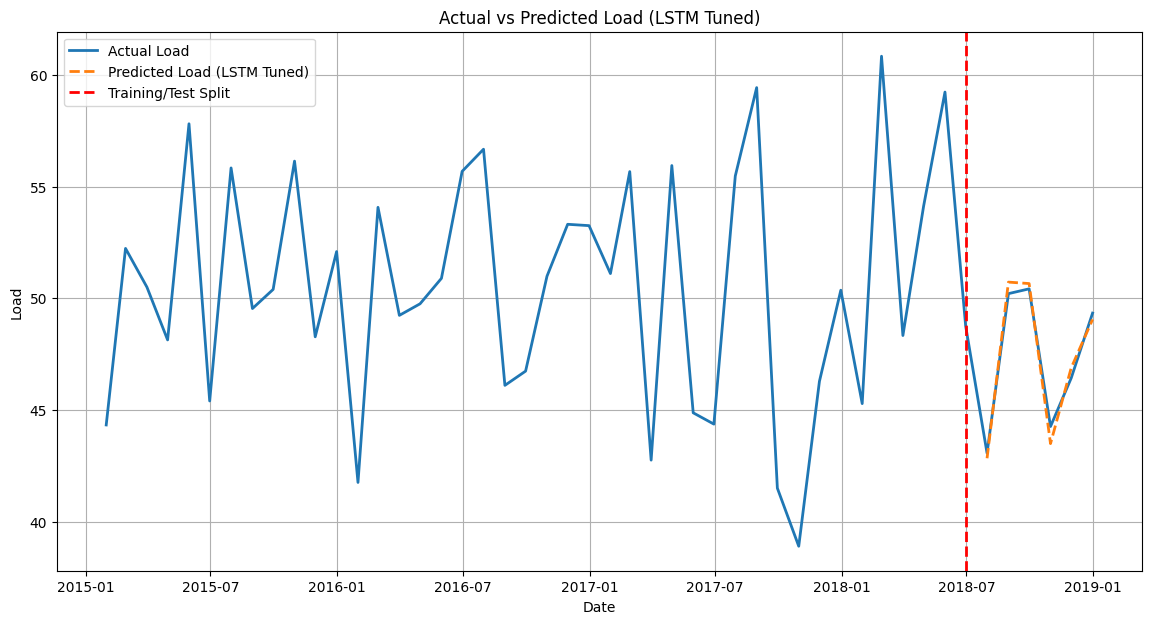

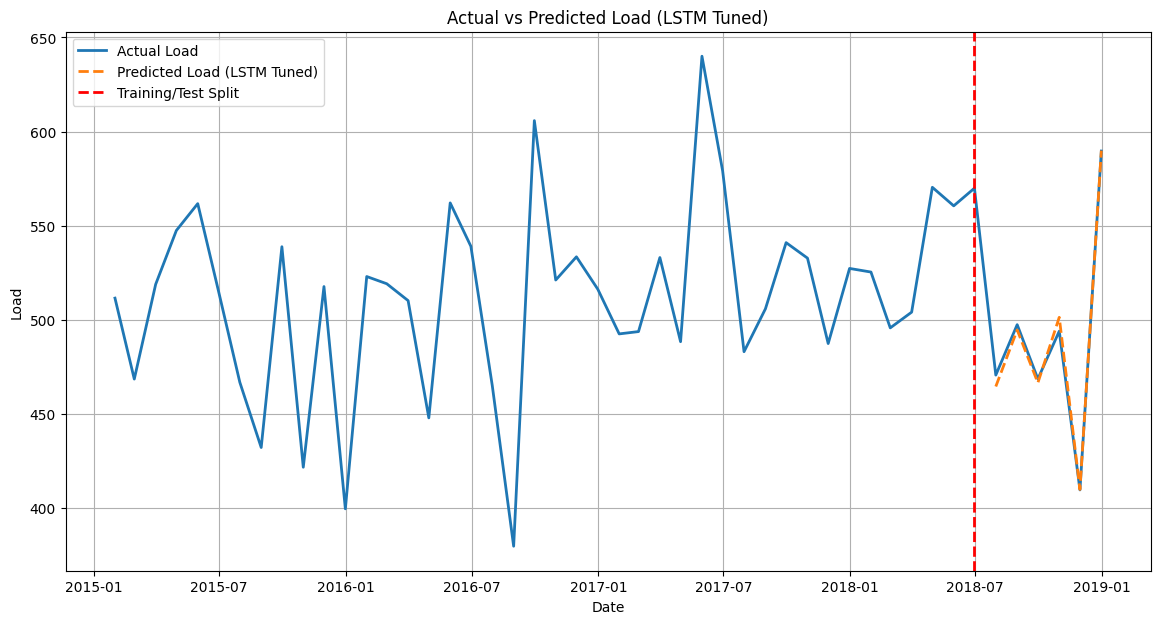

"# Plot actual vs. predicted prices\nprint('\n Actual vs. Predicted Plots')\nplt.figure(figsize=(15, 7))\nplt.plot(monthly_data.index, monthly_data['Actual Price'], label='Actual Price', color='blue', linestyle='-')\nplt.plot(monthly_data.index, monthly_data['Predicted Price'], label='Predicted Price', color='red', linestyle='--')\nplt.title('Actual vs Predicted Prices')\nplt.xlabel('Date')\nplt.ylabel('Price')\nplt.legend()\nplt.grid(True)\nplt.show()\n\n# Plot actual vs. predicted loads\nplt.figure(figsize=(15, 7))\nplt.plot(monthly_data.index, monthly_data['Actual Load'], label='Actual Load', color='blue', linestyle='-')\nplt.plot(monthly_data.index, monthly_data['Predicted Load'], label='Predicted Load', color='red', linestyle='--')\nplt.title('Actual vs Predicted Loads')\nplt.xlabel('Date')\nplt.ylabel('Load')\nplt.legend()\nplt.grid(True)\nplt.show()\n# load new plot\nplt.figure(figsize=(14, 7))\nplt.plot(df_lstm_tuned_monthly.index, df_lstm_tuned_monthly['Actual'], label='Actual

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 0.5))  # Adjust figure size as needed

# Print the title in large and bold font
plt.text(0.5, 0.5, 'Energy Demand and Price Prediction Model Final Report', 
         fontsize=20, fontweight='bold', ha='center', va='center')

plt.axis('off')  # Turn off axis for pure text display
plt.show()

# Print the tables
print("Price Prediction Metrics Table:")
print(price_df.to_string(index=False))

print("\nLoad Prediction Metrics Table:")
print(load_df.to_string(index=False))

# print best prediction
print("\nBest Model for Price Prediction:")
print("===============================")
print(best_price_model['Model'], f"Price Prediction MAPE: {best_price_model['Price Prediction MAPE (%)']}%")

print("\nBest Model for Load Prediction:")
print("==============================")
print(best_load_model['Model'], f"Load Prediction MAPE: {best_load_model['Load Prediction MAPE (%)']}%")

# Print conclusion based on best models
if best_price_model['Model'] == best_load_model['Model']:
    print(f"\nConclusion: The most suitable model for both price and load predictions is '{best_price_model['Model']}' with hyperparameter tuning, as it has the lowest MAPE values for both predictions.")
else:
    print(f"\nConclusion: The most suitable model for price prediction is '{best_price_model['Model']}' with a MAPE of {best_price_model['Price Prediction MAPE (%)']}%, and the most suitable model for load prediction is '{best_load_model['Model']}' with a MAPE of {best_load_model['Load Prediction MAPE (%)']}%.")

# Create the bar charts
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 20))

# Price feature importance
print('\n Important Features')

ax1.barh(sorted_price_features, sorted_price_importance, color='skyblue')
ax1.set_title('Feature Importance for Price Prediction')
ax1.set_xlabel('Importance Score')
ax1.set_ylabel('Features')

# Load feature importance
ax2.barh(sorted_load_features, sorted_load_importance, color='salmon')
ax2.set_title('Feature Importance for Load Prediction')
ax2.set_xlabel('Importance Score')
ax2.set_ylabel('Features')

plt.tight_layout()
plt.show()


# LSTM Tuned
predicted_prices_lstm_tuned = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_prices_lstm_tuned])
plot_actual_vs_predicted(dates, actual_prices, predicted_prices_lstm_tuned, 'LSTM Tuned')

# LSTM Tuned
predicted_loads_lstm_tuned = np.concatenate([np.full(len(train_dates), np.nan), test_predicted_loads_lstm_tuned])
plot_actual_vs_predicted(dates, actual_loads, predicted_loads_lstm_tuned, 'LSTM Tuned')




'''# Plot actual vs. predicted prices
print('\n Actual vs. Predicted Plots')
plt.figure(figsize=(15, 7))
plt.plot(monthly_data.index, monthly_data['Actual Price'], label='Actual Price', color='blue', linestyle='-')
plt.plot(monthly_data.index, monthly_data['Predicted Price'], label='Predicted Price', color='red', linestyle='--')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot actual vs. predicted loads
plt.figure(figsize=(15, 7))
plt.plot(monthly_data.index, monthly_data['Actual Load'], label='Actual Load', color='blue', linestyle='-')
plt.plot(monthly_data.index, monthly_data['Predicted Load'], label='Predicted Load', color='red', linestyle='--')
plt.title('Actual vs Predicted Loads')
plt.xlabel('Date')
plt.ylabel('Load')
plt.legend()
plt.grid(True)
plt.show()
# load new plot
plt.figure(figsize=(14, 7))
plt.plot(df_lstm_tuned_monthly.index, df_lstm_tuned_monthly['Actual'], label='Actual Load', linewidth=2)
plt.plot(df_lstm_tuned_monthly.index, df_lstm_tuned_monthly['Predicted'], label='Predicted Load (LSTM Tuned)', linewidth=2, linestyle='--')
plt.axvline(x=pd.to_datetime('2022-12-31'), color='r', linestyle='--', linewidth=2, label='Training/Test Split')
plt.xlabel('Date')
plt.ylabel('Load')
plt.title('Actual vs Predicted Load (LSTM Tuned)')
plt.legend()
plt.grid(True)
plt.show()

#new price
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df_lstm_tuned_monthly.index, df_lstm_tuned_monthly['Actual'], label='Actual Price', linewidth=2)
plt.plot(df_lstm_tuned_monthly.index, df_lstm_tuned_monthly['Predicted'], label='Predicted Price (LSTM Tuned)', linewidth=2, linestyle='--')
plt.axvline(x=pd.to_datetime('2022-12-31'), color='r', linestyle='--', linewidth=2, label='Training/Test Split')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Price (LSTM Tuned)')
plt.legend()
plt.grid(True)
plt.show()'''
